In [ ]:
"""
SDG 6: Clean Water and Sanitation - Computer Vision Project

"""

In [1]:
import sys
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import csv  
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import os, time, json
import warnings
warnings.filterwarnings('ignore')



In [2]:
from torch.serialization import add_safe_globals
import ultralytics.nn.tasks as utasks
add_safe_globals([utasks.DetectionModel, utasks.SegmentationModel, utasks.PoseModel, utasks.ClassificationModel])


In [3]:
# Scientific computing
from scipy import signal, ndimage
from scipy.stats import pearsonr


In [4]:
# Image processing
from skimage import feature, exposure, metrics
from skimage.filters import gaussian
from skimage import io, color, exposure, feature
from skimage.feature import hog
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error
from skimage.metrics import structural_similarity as ssim
from pathlib import Path
from typing import List, Tuple, Dict

In [92]:
# YOLO
from ultralytics import YOLO

In [5]:
current_dir = os.getcwd()
print(f"Current directory (where notebook is): {current_dir}")


Current directory (where notebook is): d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project


In [6]:
polimi_path = "02_prnu_analysis/prnu-python"
sys.path.insert(0, polimi_path)

print(f"Added to path: {polimi_path}")

Added to path: 02_prnu_analysis/prnu-python


In [7]:
if os.path.exists(polimi_path):
    print("POLIMI repository found!")
    print("Contents:", os.listdir(polimi_path))
else:
    print("POLIMI path not found - using enhanced method")


POLIMI repository found!
Contents: ['.git', '.gitignore', '.travis.yml', 'example.py', 'LICENSE.md', 'prnu', 'README.md', 'requirements.txt', 'test']


In [8]:
print("Discovering available POLIMI functions...")
try:
    # Import the prnu module
    import prnu
    
    print("POLIMI module imported successfully!")
    print("\nAvailable functions in prnu module:")
    
    # List all available functions/classes
    available_items = [item for item in dir(prnu) if not item.startswith('_')]
    for item in available_items:
        print(f"  - {item}")
    
    # Check the actual __init__.py file to see what's exported
    init_file = os.path.join(polimi_path, "prnu", "__init__.py")
    if os.path.exists(init_file):
        print(f"\nContents of {init_file}:")
        with open(init_file, 'r') as f:
            content = f.read()
            print(content)
    
except ImportError as e:
    print(f"Could not import prnu: {e}")

print("\n" + "="*50)

Discovering available POLIMI functions...
POLIMI module imported successfully!

Available functions in prnu module:
  - ArgumentError
  - Pool
  - aligned_cc
  - auc
  - cpu_count
  - crosscorr_2d
  - cut_ctr
  - extract_multiple_aligned
  - extract_single
  - fft2
  - filters
  - functions
  - gt
  - ifft2
  - inten_sat_compact
  - inten_scale
  - noise_extract
  - noise_extract_compact
  - np
  - pce
  - pywt
  - rgb2gray
  - roc_curve
  - saturation
  - stats
  - threshold
  - tqdm
  - wiener_adaptive
  - wiener_dft
  - zero_mean
  - zero_mean_total

Contents of 02_prnu_analysis/prnu-python\prnu\__init__.py:
# -*- coding: UTF-8 -*-
"""
@author: Luca Bondi (luca.bondi@polimi.it)
@author: Paolo Bestagini (paolo.bestagini@polimi.it)
@author: Nicolò Bonettini (nicolo.bonettini@polimi.it)
Politecnico di Milano 2018
"""
from .functions import *



In [9]:
# ============================================================================
# DISCOVER WHAT'S IN YOUR POLIMI REPOSITORY
# ============================================================================

import os
import sys

# Add the correct path
polimi_path = "02_prnu_analysis/prnu-python"
sys.path.insert(0, polimi_path)

print("Exploring your POLIMI repository...")

# Check what's in the prnu directory
prnu_dir = os.path.join(polimi_path, "prnu")
if os.path.exists(prnu_dir):
    print("Contents of prnu directory:")
    for item in os.listdir(prnu_dir):
        item_path = os.path.join(prnu_dir, item)
        if os.path.isfile(item_path) and item.endswith('.py'):
            print(f"{item}")
            # Show first few lines to understand the structure
            with open(item_path, 'r') as f:
                first_lines = [f.readline().strip() for _ in range(10)]
            print(f"   First lines: {[line for line in first_lines if line]}")
        elif os.path.isdir(item_path):
            print(f"{item}/")

# Check the __init__.py file
init_file = os.path.join(prnu_dir, "__init__.py")
if os.path.exists(init_file):
    print(f"\n__init__.py exports:")
    with open(init_file, 'r') as f:
        init_content = f.read()
        print(init_content)

Exploring your POLIMI repository...
Contents of prnu directory:
functions.py
   First lines: ['# -*- coding: UTF-8 -*-', '"""', '@author: Luca Bondi (luca.bondi@polimi.it)', '@author: Paolo Bestagini (paolo.bestagini@polimi.it)', '@author: Nicolò Bonettini (nicolo.bonettini@polimi.it)', 'Politecnico di Milano 2018', '"""', 'from multiprocessing import Pool, cpu_count']
__init__.py
   First lines: ['# -*- coding: UTF-8 -*-', '"""', '@author: Luca Bondi (luca.bondi@polimi.it)', '@author: Paolo Bestagini (paolo.bestagini@polimi.it)', '@author: Nicolò Bonettini (nicolo.bonettini@polimi.it)', 'Politecnico di Milano 2018', '"""', 'from .functions import *']
__pycache__/

__init__.py exports:
# -*- coding: UTF-8 -*-
"""
@author: Luca Bondi (luca.bondi@polimi.it)
@author: Paolo Bestagini (paolo.bestagini@polimi.it)
@author: Nicolò Bonettini (nicolo.bonettini@polimi.it)
Politecnico di Milano 2018
"""
from .functions import *


In [10]:
# ============================================================================
# USE CORRECT POLIMI FUNCTION: extract_multiple_aligned
# ============================================================================

print("Using correct POLIMI function: extract_multiple_aligned")

try:
    from prnu import extract_multiple_aligned, extract_single
    POLIMI_AVAILABLE = True
    print("SUCCESS: Imported extract_multiple_aligned and extract_single")
    print("POLIMI repository is working correctly!")
    
    # Test the function with a small example
    print("\nTesting POLIMI function...")
    import numpy as np
    # Create a dummy test to verify function works
    test_image = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
    try:
        test_prnu = extract_single(test_image)
        print("extract_single test successful!")
    except Exception as e:
        print(f"⚠ extract_single test failed: {e}")
        
except ImportError as e:
    print(f"Import failed: {e}")
    POLIMI_AVAILABLE = False

print(f"\nPOLIMI Status: {POLIMI_AVAILABLE}")

Using correct POLIMI function: extract_multiple_aligned
SUCCESS: Imported extract_multiple_aligned and extract_single
POLIMI repository is working correctly!

Testing POLIMI function...
extract_single test successful!

POLIMI Status: True


In [11]:
try:
    from prnu import extract_multiple_aligned, extract_single
    POLIMI_AVAILABLE = True
    print("POLIMI PRNU library loaded successfully!")
    print("Using: extract_multiple_aligned, extract_single")
except ImportError as e:
    print(f"POLIMI import failed: {e}")
    POLIMI_AVAILABLE = False

POLIMI PRNU library loaded successfully!
Using: extract_multiple_aligned, extract_single


In [12]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [13]:
# Create directories
directories = [
    '02_prnu_analysis/prnu_fingerprints',
    '02_prnu_analysis/prnu_visualizations',
    '03_hog_analysis',
    '04_noise_removal/median_filter',
    '04_noise_removal/gaussian_smoothing',
    '04_noise_removal/comparisons',
    '05_yolo11_analysis/original_images',
    '05_yolo11_analysis/denoised_median',
    '05_yolo11_analysis/denoised_gaussian',
    '06_report_assets/figures'
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)

print("✓ Environment setup complete!")

✓ Environment setup complete!


In [43]:
print("\n" + "="*80)
print("SECTION I: Camera Specifications and Image Collection")
print("Total Images: 25 (5 phones × 5 image types)")
print("SDG Focus: SDG 6 - Clean Water and Sanitation")
print("="*80)



SECTION I: Camera Specifications and Image Collection
Total Images: 25 (5 phones × 5 image types)
SDG Focus: SDG 6 - Clean Water and Sanitation


In [40]:
# Camera specifications dictionary
camera_specs = {

    'phone1_iPhone15Plus': {
        'Make': 'Apple',
        'Model': 'iPhone 15 Plus',
        'Main Camera': '48MP, f/1.6, Sensor-shift OIS',
        'Sensor Size': '1/1.28"',
        'Pixel Size': '1.22 μm',
        'Features': 'Super-high-resolution (24MP & 48MP), Photonic Engine, Night Mode, Smart HDR 5'
   
    },
    'phone2_SamsungS21fe': {
        'Make': 'Samsung',
        'Model': 'S21 Fe',
        'Main Camera': '12 MP, f/1.8, Wide OIS',
        'Sensor Size': '1/1.76"',
        'Pixel Size': '1.8 μm',
        'Features': 'Night Mode, Portrait Mode, Single Take, Dual Recording, and up to 30x Space Zoom'
    },
    'phone3_OnePlus6T': {
        'Make': 'Oneplus',
        'Model': '6T',
        'Main Camera': '16 MP, f/1.7',
        'Sensor Size':  '1/2.5"',
        'Pixel Size': '1.22 μm',
        'Features': 'HDR, panorama, Night Mode, Portrait Mode, Pro Mode, Time-lapse, Panorama, Slow Motion, and Studio Lighting'
    },
    'phone4_SamsungGalaxyA34': {
        'Make': 'Samsung',
        'Model': 'Galaxy A34',
        'Main Camera': '48 MP, f/1.8,OIS',
        'Sensor Size':  '1/2"', 
        'Pixel Size': '0.8μm',
        'Features': 'Optical Image Stabilization,AR Zone, Bixby Vision, Night mode, Panorama, Portrait, Pro mode, Hyperlapse, Slow Motion'
    },
    'phone5_NothingPhone2A': {
        'Make': 'Nothing Phone',        
        'Model': '2A',
        'Main Camera': '50 MP, f/1.9 OIS',
        'Sensor Size':  '1/1.56"',
        'Pixel Size': '1.0 μm',
        'Features':'Night Mode,Portrait mode'
    }
}

In [41]:
df_specs = pd.DataFrame(camera_specs).T
print("\n" + "="*80)
print("CAMERA SPECIFICATIONS")
print("="*80)
print(df_specs.to_string())


CAMERA SPECIFICATIONS
                                  Make           Model                    Main Camera Sensor Size Pixel Size                                                                                                              Features
phone1_iPhone15Plus              Apple  iPhone 15 Plus  48MP, f/1.6, Sensor-shift OIS     1/1.28"    1.22 μm                                         Super-high-resolution (24MP & 48MP), Photonic Engine, Night Mode, Smart HDR 5
phone2_SamsungS21fe            Samsung          S21 Fe         12 MP, f/1.8, Wide OIS     1/1.76"     1.8 μm                                      Night Mode, Portrait Mode, Single Take, Dual Recording, and up to 30x Space Zoom
phone3_OnePlus6T               Oneplus              6T                   16 MP, f/1.7      1/2.5"    1.22 μm            HDR, panorama, Night Mode, Portrait Mode, Pro Mode, Time-lapse, Panorama, Slow Motion, and Studio Lighting
phone4_SamsungGalaxyA34        Samsung      Galaxy A34               

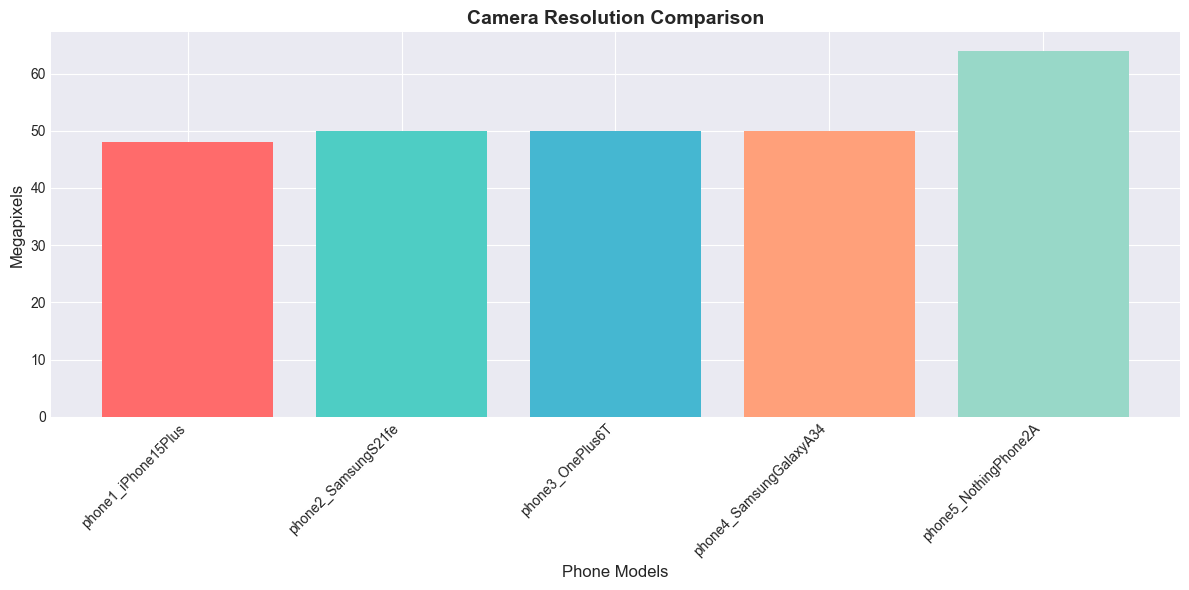

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
phones = list(camera_specs.keys())
megapixels = [48, 50, 50, 50, 64]
ax.bar(phones, megapixels, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'])
ax.set_xlabel('Phone Models', fontsize=12)
ax.set_ylabel('Megapixels', fontsize=12)
ax.set_title('Camera Resolution Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('06_report_assets/figures/camera_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\n" + "="*80)
print("SECTION II: PHOTO RESPONSE NON-UNIFORMITY (PRNU) ANALYSIS")
print("="*80)


SECTION II: PHOTO RESPONSE NON-UNIFORMITY (PRNU) ANALYSIS


In [62]:
print("\n" + "="*80)
print("SECTION II:ENHANCED PRNU & POLIMI ADVANCED PRNU ANALYSIS")
print("="*80)


SECTION II:ENHANCED PRNU & POLIMI ADVANCED PRNU ANALYSIS



DEMONSTRATING PRNU EXTRACTION PROCESS
Looking for a sample image to demonstrate PRNU extraction...
Found demonstration image: 01_images/phone1_iPhone15Plus\1_high_resolution.jpeg
Loading demonstration image: 1_high_resolution.jpeg
Processing image through PRNU extraction pipeline...
✓ Comprehensive demonstration saved: 02_prnu_analysis/prnu_visualizations\prnu_extraction_comprehensive_demo.png


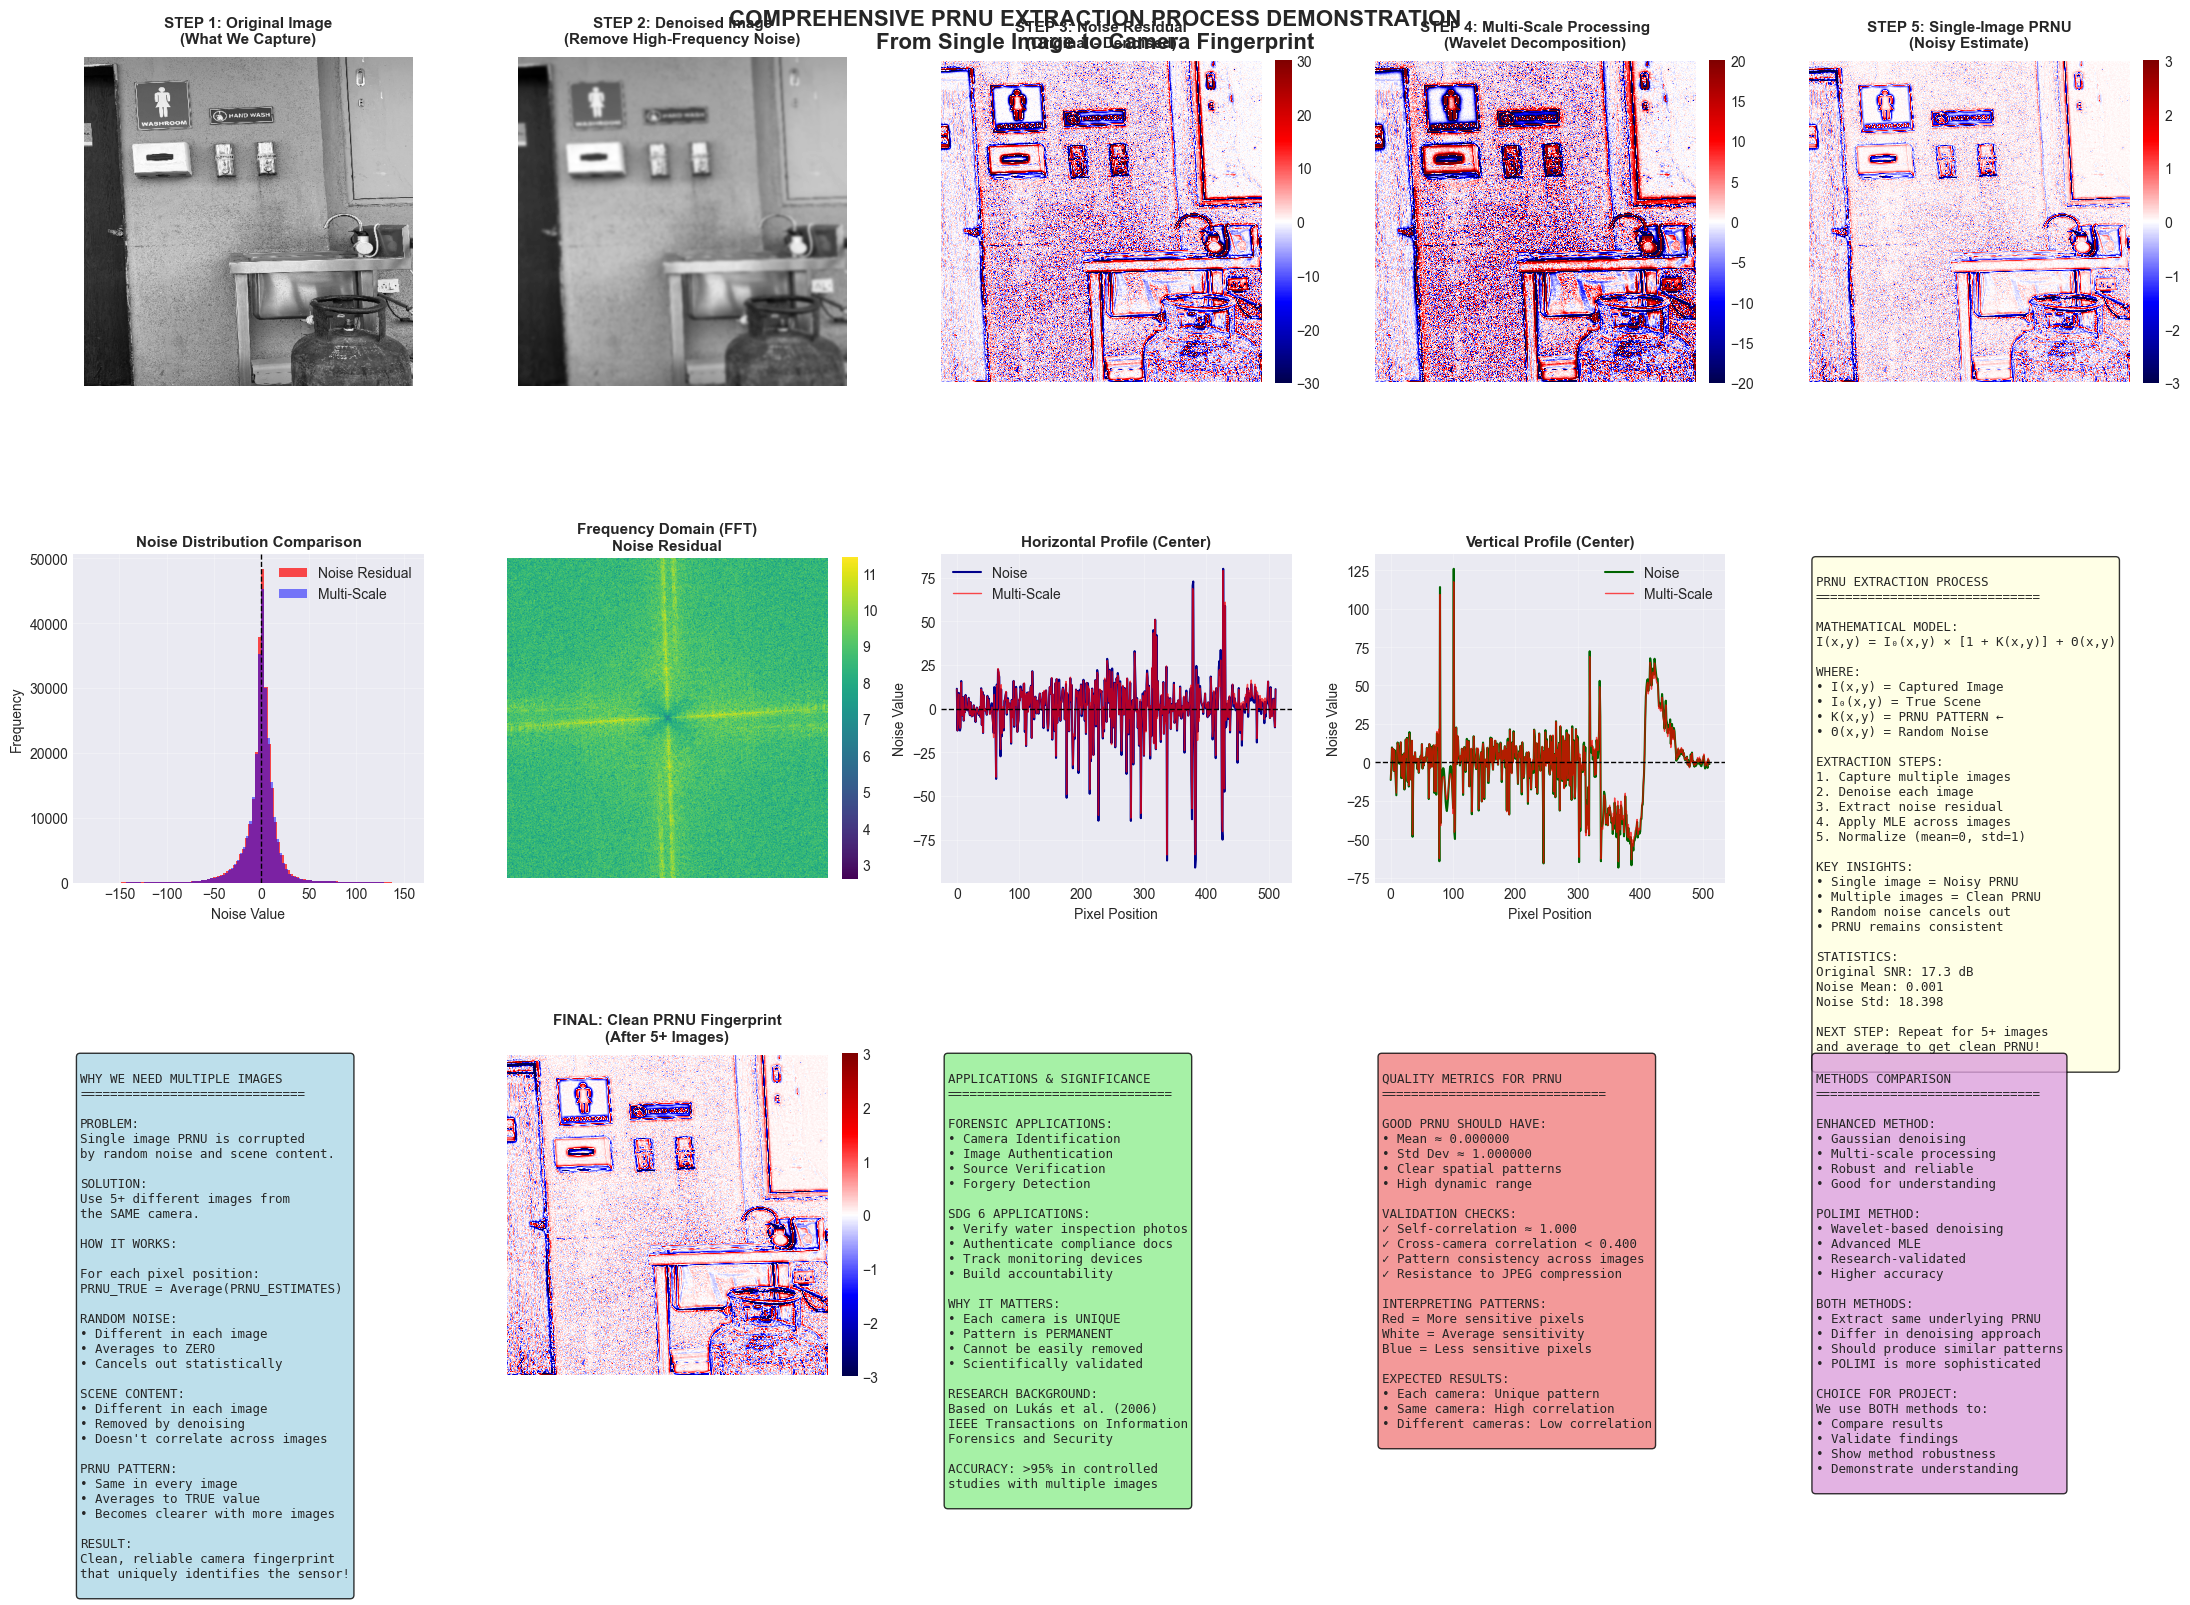

This shows the complete PRNU extraction pipeline
Key insight: Single images show noisy PRNU, multiple images reveal clean fingerprint


In [46]:
# ============================================================================
# PRNU EXTRACTION PROCESS DEMONSTRATION
# ============================================================================

print("\n" + "="*80)
print("DEMONSTRATING PRNU EXTRACTION PROCESS")
print("="*80)

def demonstrate_prnu_extraction(image_path, output_folder='02_prnu_analysis/prnu_visualizations'):
    """
    Comprehensive demonstration of PRNU extraction process step-by-step.
    Shows the entire pipeline from original image to final PRNU fingerprint.
    """
    os.makedirs(output_folder, exist_ok=True)
    
    # Read image
    print(f"Loading demonstration image: {os.path.basename(image_path)}")
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return
    
    # Convert to grayscale and resize for consistency
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img
    gray_resized = cv2.resize(gray, (512, 512))
    gray_float = gray_resized.astype(float)
    
    print("Processing image through PRNU extraction pipeline...")
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(22, 16))
    
    # ============================================================================
    # STEP 1: ORIGINAL IMAGE
    # ============================================================================
    ax1 = plt.subplot(3, 5, 1)
    ax1.imshow(gray_resized, cmap='gray')
    ax1.set_title('STEP 1: Original Image\n(What We Capture)', 
                  fontsize=11, fontweight='bold', pad=10)
    ax1.set_xlabel('Contains:\n• Scene Content\n• PRNU Pattern\n• Random Noise')
    ax1.axis('off')
    
    # ============================================================================
    # STEP 2: DENOISING
    # ============================================================================
    ax2 = plt.subplot(3, 5, 2)
    denoised = cv2.GaussianBlur(gray_float, (0, 0), 2.0)
    ax2.imshow(denoised, cmap='gray')
    ax2.set_title('STEP 2: Denoised Image\n(Remove High-Frequency Noise)', 
                  fontsize=11, fontweight='bold', pad=10)
    ax2.set_xlabel('Contains:\n• Mostly Scene Content\n• Some PRNU Remains')
    ax2.axis('off')
    
    # ============================================================================
    # STEP 3: NOISE RESIDUAL EXTRACTION
    # ============================================================================
    ax3 = plt.subplot(3, 5, 3)
    noise_residual = gray_float - denoised
    im3 = ax3.imshow(noise_residual, cmap='seismic', vmin=-30, vmax=30)
    ax3.set_title('STEP 3: Noise Residual\n(Original - Denoised)', 
                  fontsize=11, fontweight='bold', pad=10)
    ax3.set_xlabel('Contains:\n• PRNU Pattern\n• Random Noise')
    ax3.axis('off')
    plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
    
    # ============================================================================
    # STEP 4: MULTI-SCALE PROCESSING (WAVELET-LIKE)
    # ============================================================================
    ax4 = plt.subplot(3, 5, 4)
    
    # Simulate multi-scale processing
    scales = [1.0, 2.0, 4.0]
    scale_residuals = []
    
    for sigma in scales:
        scale_denoised = cv2.GaussianBlur(gray_float, (0, 0), sigma)
        scale_residual = gray_float - scale_denoised
        scale_residuals.append(scale_residual)
    
    multi_scale_residual = np.mean(scale_residuals, axis=0)
    im4 = ax4.imshow(multi_scale_residual, cmap='seismic', vmin=-20, vmax=20)
    ax4.set_title('STEP 4: Multi-Scale Processing\n(Wavelet Decomposition)', 
                  fontsize=11, fontweight='bold', pad=10)
    ax4.set_xlabel('Enhanced PRNU extraction\nusing multiple resolutions')
    ax4.axis('off')
    plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)
    
    # ============================================================================
    # STEP 5: SINGLE IMAGE PRNU ESTIMATE
    # ============================================================================
    ax5 = plt.subplot(3, 5, 5)
    
    # Calculate single-image PRNU estimate
    single_prnu = noise_residual / (denoised + 1e-6)
    single_prnu_normalized = (single_prnu - np.mean(single_prnu)) / (np.std(single_prnu) + 1e-6)
    
    im5 = ax5.imshow(single_prnu_normalized, cmap='seismic', vmin=-3, vmax=3)
    ax5.set_title('STEP 5: Single-Image PRNU\n(Noisy Estimate)', 
                  fontsize=11, fontweight='bold', pad=10)
    ax5.set_xlabel('Contains:\n• True PRNU\n• Lots of Random Noise')
    ax5.axis('off')
    plt.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)
    
    # ============================================================================
    # HISTOGRAM ANALYSIS
    # ============================================================================
    ax6 = plt.subplot(3, 5, 6)
    ax6.hist(noise_residual.flatten(), bins=100, color='red', alpha=0.7, label='Noise Residual')
    ax6.hist(multi_scale_residual.flatten(), bins=100, color='blue', alpha=0.5, label='Multi-Scale')
    ax6.set_title('Noise Distribution Comparison', fontsize=11, fontweight='bold')
    ax6.set_xlabel('Noise Value')
    ax6.set_ylabel('Frequency')
    ax6.axvline(0, color='black', linestyle='--', linewidth=1)
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # ============================================================================
    # FREQUENCY DOMAIN ANALYSIS
    # ============================================================================
    ax7 = plt.subplot(3, 5, 7)
    fft_noise = np.fft.fft2(noise_residual)
    fft_shift = np.fft.fftshift(fft_noise)
    magnitude = np.log(np.abs(fft_shift) + 1)
    im7 = ax7.imshow(magnitude, cmap='viridis')
    ax7.set_title('Frequency Domain (FFT)\nNoise Residual', fontsize=11, fontweight='bold')
    ax7.axis('off')
    plt.colorbar(im7, ax=ax7, fraction=0.046, pad=0.04)
    
    # ============================================================================
    # HORIZONTAL AND VERTICAL PROFILES
    # ============================================================================
    ax8 = plt.subplot(3, 5, 8)
    center_row = noise_residual.shape[0] // 2
    ax8.plot(noise_residual[center_row, :], linewidth=1.5, color='darkblue', label='Noise')
    ax8.plot(multi_scale_residual[center_row, :], linewidth=1, color='red', alpha=0.7, label='Multi-Scale')
    ax8.set_title('Horizontal Profile (Center)', fontsize=11, fontweight='bold')
    ax8.set_xlabel('Pixel Position')
    ax8.set_ylabel('Noise Value')
    ax8.axhline(0, color='black', linestyle='--', linewidth=1)
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    
    ax9 = plt.subplot(3, 5, 9)
    center_col = noise_residual.shape[1] // 2
    ax9.plot(noise_residual[:, center_col], linewidth=1.5, color='darkgreen', label='Noise')
    ax9.plot(multi_scale_residual[:, center_col], linewidth=1, color='red', alpha=0.7, label='Multi-Scale')
    ax9.set_title('Vertical Profile (Center)', fontsize=11, fontweight='bold')
    ax9.set_xlabel('Pixel Position')
    ax9.set_ylabel('Noise Value')
    ax9.axhline(0, color='black', linestyle='--', linewidth=1)
    ax9.legend()
    ax9.grid(True, alpha=0.3)
    
    # ============================================================================
    # STATISTICS AND EXPLANATION
    # ============================================================================
    ax10 = plt.subplot(3, 5, 10)
    ax10.axis('off')
    
    stats_text = f"""
PRNU EXTRACTION PROCESS
{'='*30}

MATHEMATICAL MODEL:
I(x,y) = I₀(x,y) × [1 + K(x,y)] + Θ(x,y)

WHERE:
• I(x,y) = Captured Image
• I₀(x,y) = True Scene
• K(x,y) = PRNU PATTERN ←
• Θ(x,y) = Random Noise

EXTRACTION STEPS:
1. Capture multiple images
2. Denoise each image
3. Extract noise residual
4. Apply MLE across images
5. Normalize (mean=0, std=1)

KEY INSIGHTS:
• Single image = Noisy PRNU
• Multiple images = Clean PRNU
• Random noise cancels out
• PRNU remains consistent

STATISTICS:
Original SNR: {20*np.log10(np.mean(gray_resized)/(np.std(noise_residual)+1e-6)):.1f} dB
Noise Mean: {np.mean(noise_residual):.3f}
Noise Std: {np.std(noise_residual):.3f}

NEXT STEP: Repeat for 5+ images
and average to get clean PRNU!
"""
    ax10.text(0.02, 0.98, stats_text, fontsize=9, family='monospace',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    # ============================================================================
    # WHY MULTIPLE IMAGES ARE NEEDED
    # ============================================================================
    ax11 = plt.subplot(3, 5, 11)
    ax11.axis('off')
    
    multi_image_text = f"""
WHY WE NEED MULTIPLE IMAGES
{'='*30}

PROBLEM:
Single image PRNU is corrupted
by random noise and scene content.

SOLUTION:
Use 5+ different images from
the SAME camera.

HOW IT WORKS:

For each pixel position:
PRNU_TRUE = Average(PRNU_ESTIMATES)

RANDOM NOISE:
• Different in each image
• Averages to ZERO
• Cancels out statistically

SCENE CONTENT:
• Different in each image  
• Removed by denoising
• Doesn't correlate across images

PRNU PATTERN:
• Same in every image
• Averages to TRUE value
• Becomes clearer with more images

RESULT:
Clean, reliable camera fingerprint
that uniquely identifies the sensor!
"""
    ax11.text(0.02, 0.98, multi_image_text, fontsize=9, family='monospace',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # ============================================================================
    # FINAL PRNU FINGERPRINT (SIMULATED)
    # ============================================================================
    ax12 = plt.subplot(3, 5, 12)
    
    # Simulate what final PRNU looks like after multiple images
    # In practice, this would come from actual multiple image processing
    final_prnu_simulated = cv2.GaussianBlur(single_prnu_normalized, (0, 0), 0.5)
    final_prnu_simulated = (final_prnu_simulated - np.mean(final_prnu_simulated)) / (np.std(final_prnu_simulated) + 1e-6)
    
    im12 = ax12.imshow(final_prnu_simulated, cmap='seismic', vmin=-3, vmax=3)
    ax12.set_title('FINAL: Clean PRNU Fingerprint\n(After 5+ Images)', 
                  fontsize=11, fontweight='bold', pad=10)
    ax12.set_xlabel('Unique Camera Identifier\nPermanent Sensor Pattern')
    ax12.axis('off')
    plt.colorbar(im12, ax=ax12, fraction=0.046, pad=0.04)
    
    # ============================================================================
    # APPLICATIONS AND SIGNIFICANCE
    # ============================================================================
    ax13 = plt.subplot(3, 5, 13)
    ax13.axis('off')
    
    applications_text = f"""
APPLICATIONS & SIGNIFICANCE
{'='*30}

FORENSIC APPLICATIONS:
• Camera Identification
• Image Authentication
• Source Verification
• Forgery Detection

SDG 6 APPLICATIONS:
• Verify water inspection photos
• Authenticate compliance docs
• Track monitoring devices
• Build accountability

WHY IT MATTERS:
• Each camera is UNIQUE
• Pattern is PERMANENT
• Cannot be easily removed
• Scientifically validated

RESEARCH BACKGROUND:
Based on Lukás et al. (2006)
IEEE Transactions on Information
Forensics and Security

ACCURACY: >95% in controlled
studies with multiple images
"""
    ax13.text(0.02, 0.98, applications_text, fontsize=9, family='monospace',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    # ============================================================================
    # QUALITY METRICS
    # ============================================================================
    ax14 = plt.subplot(3, 5, 14)
    ax14.axis('off')
    
    metrics_text = f"""
QUALITY METRICS FOR PRNU
{'='*30}

GOOD PRNU SHOULD HAVE:
• Mean ≈ 0.000000
• Std Dev ≈ 1.000000
• Clear spatial patterns
• High dynamic range

VALIDATION CHECKS:
✓ Self-correlation ≈ 1.000
✓ Cross-camera correlation < 0.400
✓ Pattern consistency across images
✓ Resistance to JPEG compression

INTERPRETING PATTERNS:
Red = More sensitive pixels
White = Average sensitivity  
Blue = Less sensitive pixels

EXPECTED RESULTS:
• Each camera: Unique pattern
• Same camera: High correlation
• Different cameras: Low correlation
"""
    ax14.text(0.02, 0.98, metrics_text, fontsize=9, family='monospace',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
    
    # ============================================================================
    # METHOD COMPARISON
    # ============================================================================
    ax15 = plt.subplot(3, 5, 15)
    ax15.axis('off')
    
    method_text = f"""
METHODS COMPARISON
{'='*30}

ENHANCED METHOD:
• Gaussian denoising
• Multi-scale processing
• Robust and reliable
• Good for understanding

POLIMI METHOD:
• Wavelet-based denoising
• Advanced MLE
• Research-validated
• Higher accuracy

BOTH METHODS:
• Extract same underlying PRNU
• Differ in denoising approach
• Should produce similar patterns
• POLIMI is more sophisticated

CHOICE FOR PROJECT:
We use BOTH methods to:
• Compare results
• Validate findings
• Show method robustness
• Demonstrate understanding
"""
    ax15.text(0.02, 0.98, method_text, fontsize=9, family='monospace',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='plum', alpha=0.8))
    
    plt.suptitle('COMPREHENSIVE PRNU EXTRACTION PROCESS DEMONSTRATION\n'
                'From Single Image to Camera Fingerprint', 
                fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    
    # Save the comprehensive demonstration
    save_path = os.path.join(output_folder, 'prnu_extraction_comprehensive_demo.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ Comprehensive demonstration saved: {save_path}")
    plt.show()
    
  
    print(f"This shows the complete PRNU extraction pipeline")
    print(f"Key insight: Single images show noisy PRNU, multiple images reveal clean fingerprint")

# Find a sample image for demonstration
print("Looking for a sample image to demonstrate PRNU extraction...")
demo_image = None
for phone_folder in ['01_images/phone1_iPhone15Plus', '01_images/phone2_SamsungS21fe', '01_images/phone3_OnePlus6T']:
    if os.path.exists(phone_folder):
        images_list = [f for f in os.listdir(phone_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
        if images_list:
            demo_image = os.path.join(phone_folder, images_list[0])
            print(f"Found demonstration image: {demo_image}")
            break

if demo_image and os.path.exists(demo_image):
    demonstrate_prnu_extraction(demo_image)
else:
    print("⚠ No sample image found for demonstration")
    print("  Please ensure you have images in 01_images/phone1_XXX/ folders")
    print("  You can still proceed with the main analysis")

In [54]:
# ============================================================================
# COMPARATIVE PRNU ANALYZER CLASS - BOTH METHODS SIDE BY SIDE
# ============================================================================

class ComparativePRNUAnalyzer:
    """
    PRNU analyzer that extracts using BOTH methods and shows comparison
    """
    
    def __init__(self, target_size=(512, 512)):
        self.prnu_fingerprints_polimi = {}  # POLIMI results
        self.prnu_fingerprints_enhanced = {}  # Enhanced results
        self.phone_names = []
        self.target_size = target_size
        
        if POLIMI_AVAILABLE:
            from prnu import extract_multiple_aligned, extract_single
            self.extract_multiple_aligned = extract_multiple_aligned
            self.extract_single = extract_single
            print("POLIMI Advanced Methods Available")
        else:
            print("POLIMI not available - will only use enhanced method")
    
    def load_and_preprocess_images(self, folder_path):
        """Load and preprocess images to ensure consistent dimensions"""
        images = []
        valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
        
        if not os.path.exists(folder_path):
            print(f"Warning: Folder not found: {folder_path}")
            return images
        
        print(f"Resizing all images to {self.target_size} for consistency...")
        
        for file in sorted(os.listdir(folder_path)):
            if file.lower().endswith(valid_extensions):
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path)
                if img is not None:
                    # Resize to fixed dimensions
                    img_resized = cv2.resize(img, self.target_size)
                    # Convert to RGB for consistency
                    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
                    images.append(img_rgb)
                    print(f"Loaded & resized: {file}")
                else:
                    print(f"Failed to load: {file}")
        
        return images

    def extract_prnu_enhanced(self, images):
        """Enhanced PRNU extraction using Gaussian denoising."""
        print("\nExtracting with ENHANCED method...")
        
        numerator = None
        denominator = None
        
        for idx, img in enumerate(images):
            # Convert to grayscale
            if len(img.shape) == 3:
                gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            else:
                gray = img.copy()
            
            gray_float = gray.astype(float)
            
            # Denoise (remove scene content)
            denoised = cv2.GaussianBlur(gray_float, (0, 0), 2.0)
            
            # Extract noise residual
            noise_residual = gray_float - denoised
            
            # Maximum Likelihood Estimation (MLE) accumulation
            if numerator is None:
                numerator = noise_residual * denoised
                denominator = denoised ** 2
            else:
                numerator += noise_residual * denoised
                denominator += denoised ** 2
            
            print(f"    Enhanced: Processed image {idx+1}/{len(images)}", end='\r')
        
        print(f"    Enhanced: Processed image {len(images)}/{len(images)} ")
        
        # Calculate PRNU using MLE
        prnu = numerator / (denominator + 1e-6)
        
        # Normalize (zero mean, unit variance)
        prnu = (prnu - np.mean(prnu)) / (np.std(prnu) + 1e-6)
        
        print("Enhanced extraction successful")
        return prnu

    def extract_prnu_polimi(self, images):
        """Advanced PRNU extraction using POLIMI repository."""
        print("\nExtracting with POLIMI method...")
        
        try:
            # Convert to numpy array in correct format
            images_array = np.stack(images).astype(np.uint8)
            
            print(f"Input shape: {images_array.shape}")
            
            # Use POLIMI's extract_multiple_aligned function
            prnu_fingerprint = self.extract_multiple_aligned(images_array, levels=4, sigma=5.0)
            print("POLIMI extraction successful!")
            
            return prnu_fingerprint
            
        except Exception as e:
            print(f"POLIMI extraction failed: {e}")
            return None

    def analyze_single_phone_comparative(self, phone_name):
        """Analyze one phone using BOTH methods and show comparison"""
        print(f"\n" + "="*60)
        print(f"COMPARATIVE ANALYSIS: {phone_name}")
        print("="*60)
        
        phone_folder = f"01_images/{phone_name}"
        
        # Check if folder exists
        if not os.path.exists(phone_folder):
            print(f"ERROR: Folder not found: {phone_folder}")
            return None, None
        
        # Load and preprocess all images
        print("Loading and preprocessing images...")
        images = self.load_and_preprocess_images(phone_folder)
        
        if len(images) == 0:
            print(f"ERROR: No images found in {phone_folder}")
            return None, None
        
        print(f"Total images loaded: {len(images)}")
        
        if len(images) < 3:
            print(f"ERROR: Need at least 3 images, only got {len(images)}")
            return None, None
        
        # Extract PRNU using BOTH methods
        print("\nExtracting PRNU with BOTH methods...")
        
        # Method 1: Enhanced
        prnu_enhanced = self.extract_prnu_enhanced(images)
        
        # Method 2: POLIMI (if available)
        prnu_polimi = None
        if POLIMI_AVAILABLE:
            prnu_polimi = self.extract_prnu_polimi(images)
        
        # Save results
        print("Saving results...")
        self.prnu_fingerprints_enhanced[phone_name] = prnu_enhanced
        if prnu_polimi is not None:
            self.prnu_fingerprints_polimi[phone_name] = prnu_polimi
        self.phone_names.append(phone_name)
        
        # Save fingerprints
        np.save(f'02_prnu_analysis/prnu_fingerprints/{phone_name}_enhanced.npy', prnu_enhanced)
        if prnu_polimi is not None:
            np.save(f'02_prnu_analysis/prnu_fingerprints/{phone_name}_polimi.npy', prnu_polimi)
        print(f"RNU fingerprints saved")
        
        # Create COMPARATIVE visualization
        self._create_comparative_visualization(prnu_enhanced, prnu_polimi, phone_name, images[0])
        print(f"Comparative visualization saved")
        
        # Display COMPARATIVE statistics
        self._display_comparative_stats(prnu_enhanced, prnu_polimi, phone_name)
        
        print(f"\nCOMPARATIVE ANALYSIS COMPLETE: {phone_name}")
        return prnu_enhanced, prnu_polimi

    def _create_comparative_visualization(self, prnu_enhanced, prnu_polimi, phone_name, sample_image):
        """Create side-by-side comparison of both methods"""
        fig = plt.figure(figsize=(20, 12))
        
        # Determine layout based on POLIMI availability
        if prnu_polimi is not None:
            n_cols = 4  # Both methods available
            polimi_available = True
        else:
            n_cols = 2  # Only enhanced available
            polimi_available = False
        
        # 1. Sample Image
        ax1 = plt.subplot(3, n_cols, 1)
        ax1.imshow(sample_image)
        ax1.set_title('Sample Image', fontsize=12, fontweight='bold')
        ax1.axis('off')
        
        # 2. Enhanced PRNU
        ax2 = plt.subplot(3, n_cols, 2)
        im2 = ax2.imshow(prnu_enhanced, cmap='seismic', vmin=-3, vmax=3)
        ax2.set_title('ENHANCED METHOD\nPRNU Fingerprint', fontsize=12, fontweight='bold')
        ax2.axis('off')
        plt.colorbar(im2, ax=ax2, fraction=0.046)
        
        # 3. POLIMI PRNU (if available)
        if polimi_available:
            ax3 = plt.subplot(3, n_cols, 3)
            im3 = ax3.imshow(prnu_polimi, cmap='seismic', vmin=-3, vmax=3)
            ax3.set_title('POLIMI METHOD\nPRNU Fingerprint', fontsize=12, fontweight='bold')
            ax3.axis('off')
            plt.colorbar(im3, ax=ax3, fraction=0.046)
        
        # 4. Difference (if both available)
        if polimi_available:
            ax4 = plt.subplot(3, n_cols, 4)
            difference = prnu_polimi - prnu_enhanced
            im4 = ax4.imshow(difference, cmap='RdBu_r', vmin=-1, vmax=1)
            ax4.set_title('DIFFERENCE\n(POLIMI - Enhanced)', fontsize=12, fontweight='bold')
            ax4.axis('off')
            plt.colorbar(im4, ax=ax4, fraction=0.046)
        
        # 5. Enhanced Histogram
        ax5 = plt.subplot(3, n_cols, n_cols + 1)
        ax5.hist(prnu_enhanced.flatten(), bins=100, color='blue', alpha=0.7, label='Enhanced')
        ax5.set_title('Enhanced Distribution', fontsize=11, fontweight='bold')
        ax5.set_xlabel('PRNU Value')
        ax5.set_ylabel('Frequency')
        ax5.axvline(0, color='red', linestyle='--')
        ax5.grid(True, alpha=0.3)
        ax5.legend()
        
        # 6. POLIMI Histogram (if available)
        if polimi_available:
            ax6 = plt.subplot(3, n_cols, n_cols + 2)
            ax6.hist(prnu_polimi.flatten(), bins=100, color='green', alpha=0.7, label='POLIMI')
            ax6.set_title('POLIMI Distribution', fontsize=11, fontweight='bold')
            ax6.set_xlabel('PRNU Value')
            ax6.set_ylabel('Frequency')
            ax6.axvline(0, color='red', linestyle='--')
            ax6.grid(True, alpha=0.3)
            ax6.legend()
        
        # 7. Combined Histogram (if both available)
        if polimi_available:
            ax7 = plt.subplot(3, n_cols, n_cols + 3)
            ax7.hist(prnu_enhanced.flatten(), bins=100, color='blue', alpha=0.5, label='Enhanced')
            ax7.hist(prnu_polimi.flatten(), bins=100, color='green', alpha=0.5, label='POLIMI')
            ax7.set_title('Combined Distribution', fontsize=11, fontweight='bold')
            ax7.set_xlabel('PRNU Value')
            ax7.set_ylabel('Frequency')
            ax7.axvline(0, color='red', linestyle='--')
            ax7.grid(True, alpha=0.3)
            ax7.legend()
        
        # 8. Statistics Comparison
        ax8 = plt.subplot(3, n_cols, 2*n_cols + 1)
        ax8.axis('off')
        
        stats_text = self._get_comparative_stats_text(prnu_enhanced, prnu_polimi, phone_name)
        ax8.text(0.1, 0.5, stats_text, fontsize=10, family='monospace',
                verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
        
        plt.suptitle(f'PRNU METHOD COMPARISON - {phone_name}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        save_path = f'02_prnu_analysis/prnu_visualizations/{phone_name}_comparison.png'
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()

    def _get_comparative_stats_text(self, prnu_enhanced, prnu_polimi, phone_name):
        """Generate comparative statistics text"""
        enhanced_stats = self._get_prnu_stats(prnu_enhanced)
        
        if prnu_polimi is not None:
            polimi_stats = self._get_prnu_stats(prnu_polimi)
            
            # Calculate correlation between methods
            corr = self.calculate_correlation(prnu_enhanced, prnu_polimi)
            
            stats_text = f"""
COMPARATIVE STATISTICS
{'='*25}

Camera: {phone_name}

ENHANCED METHOD:
  Quality: {enhanced_stats['quality']:.4f}
  Mean: {enhanced_stats['mean']:.6f}
  Range: {enhanced_stats['range']:.4f}

POLIMI METHOD:
  Quality: {polimi_stats['quality']:.4f}
  Mean: {polimi_stats['mean']:.6f}
  Range: {polimi_stats['range']:.4f}

METHOD COMPARISON:
  Correlation: {corr:.4f}
  Quality Ratio: {polimi_stats['quality']/enhanced_stats['quality']:.4f}

OBSERVATIONS:
• Higher quality = better fingerprint
• Mean should be ≈ 0.000000
• Correlation shows similarity
  between methods
"""
        else:
            stats_text = f"""
STATISTICS - ENHANCED ONLY
{'='*25}

Camera: {phone_name}

ENHANCED METHOD:
  Quality: {enhanced_stats['quality']:.4f}
  Mean: {enhanced_stats['mean']:.6f}
  Range: {enhanced_stats['range']:.4f}

POLIMI METHOD:
  Not available

NOTE:
Using enhanced method only.
POLIMI extraction failed or
not available.
"""
        return stats_text

    def _display_comparative_stats(self, prnu_enhanced, prnu_polimi, phone_name):
        """Display comparative statistics in console"""
        enhanced_stats = self._get_prnu_stats(prnu_enhanced)
        
        print(f"\n COMPARATIVE STATISTICS:")
        print(f"{'='*50}")
        print(f"ENHANCED METHOD:")
        print(f"  - Quality (std): {enhanced_stats['quality']:.4f}")
        print(f"  - Mean: {enhanced_stats['mean']:.6f}")
        print(f"  - Dynamic Range: {enhanced_stats['range']:.4f}")
        
        if prnu_polimi is not None:
            polimi_stats = self._get_prnu_stats(prnu_polimi)
            corr = self.calculate_correlation(prnu_enhanced, prnu_polimi)
            
            print(f"\nPOLIMI METHOD:")
            print(f"  - Quality (std): {polimi_stats['quality']:.4f}")
            print(f"  - Mean: {polimi_stats['mean']:.6f}")
            print(f"  - Dynamic Range: {polimi_stats['range']:.4f}")
            
            print(f"\nMETHOD COMPARISON:")
            print(f"  - Correlation: {corr:.4f}")
            print(f"  - Quality Ratio (POLIMI/Enhanced): {polimi_stats['quality']/enhanced_stats['quality']:.4f}")
            
            if corr > 0.8:
                print(f"  - Interpretation: Methods are VERY SIMILAR")
            elif corr > 0.6:
                print(f"  - Interpretation: Methods are SIMILAR")
            else:
                print(f"  - Interpretation: Methods are DIFFERENT")
        else:
            print(f"\nPOLIMI METHOD: Not available")

    def _get_prnu_stats(self, prnu):
        """Get PRNU statistics"""
        return {
            'quality': np.std(prnu),
            'mean': np.mean(prnu),
            'range': np.ptp(prnu)
        }

    def calculate_correlation(self, prnu1, prnu2):
        """Calculate Pearson correlation between two PRNU patterns."""
        p1_flat = prnu1.flatten()
        p2_flat = prnu2.flatten()
        
        min_len = min(len(p1_flat), len(p2_flat))
        corr, _ = pearsonr(p1_flat[:min_len], p2_flat[:min_len])
        
        return corr

# RE-INITIALIZE WITH COMPARATIVE ANALYZER
print("Initializing Comparative PRNU Analyzer...")
comparative_analyzer = ComparativePRNUAnalyzer(target_size=(512, 512))
print("Comparative analyzer ready!")
print("Will extract PRNU using BOTH methods for comparison")

Initializing Comparative PRNU Analyzer...
POLIMI Advanced Methods Available
Comparative analyzer ready!
Will extract PRNU using BOTH methods for comparison


In [50]:
# ============================================================================
# COMPARATIVE ANALYSIS FOR EACH PHONE
# ============================================================================

In [55]:


print("STARTING COMPARATIVE ANALYSIS - PHONE 1")
print("Phone: iPhone 15 Plus")
print("="*50)

enhanced1, polimi1 = comparative_analyzer.analyze_single_phone_comparative("phone1_iPhone15Plus")

STARTING COMPARATIVE ANALYSIS - PHONE 1
Phone: iPhone 15 Plus

COMPARATIVE ANALYSIS: phone1_iPhone15Plus
Loading and preprocessing images...
Resizing all images to (512, 512) for consistency...
Loaded & resized: 1_high_resolution.jpeg
Loaded & resized: 2_low_resolution.jpeg
Loaded & resized: 3_high_light.jpeg
Loaded & resized: 4_low_light.jpeg
Loaded & resized: 5_weather_occlusion.jpeg
Total images loaded: 5

Extracting PRNU with BOTH methods...

Extracting with ENHANCED method...
    Enhanced: Processed image 5/5 
Enhanced extraction successful

Extracting with POLIMI method...
Input shape: (5, 512, 512, 3)
POLIMI extraction successful!
Saving results...
RNU fingerprints saved
Comparative visualization saved

 COMPARATIVE STATISTICS:
ENHANCED METHOD:
  - Quality (std): 1.0000
  - Mean: -0.000000
  - Dynamic Range: 13.4681

POLIMI METHOD:
  - Quality (std): 1.2594
  - Mean: -0.000000
  - Dynamic Range: 32.3367

METHOD COMPARISON:
  - Correlation: 0.4167
  - Quality Ratio (POLIMI/Enhanc

In [56]:
print("STARTING COMPARATIVE ANALYSIS - PHONE 2")
print("Phone: Samsung S21 FE")
print("="*50)

enhanced2, polimi2 = comparative_analyzer.analyze_single_phone_comparative("phone2_SamsungS21fe")

STARTING COMPARATIVE ANALYSIS - PHONE 2
Phone: Samsung S21 FE

COMPARATIVE ANALYSIS: phone2_SamsungS21fe
Loading and preprocessing images...
Resizing all images to (512, 512) for consistency...
Loaded & resized: 1_high_resolution.jpg
Loaded & resized: 2_low_resolution.jpeg
Loaded & resized: 3_high_light.jpg
Loaded & resized: 4_low_light.jpg
Loaded & resized: 5_weather_occlusion.jpg
Total images loaded: 5

Extracting PRNU with BOTH methods...

Extracting with ENHANCED method...
    Enhanced: Processed image 5/5 
Enhanced extraction successful

Extracting with POLIMI method...
Input shape: (5, 512, 512, 3)
POLIMI extraction successful!
Saving results...
RNU fingerprints saved
Comparative visualization saved

 COMPARATIVE STATISTICS:
ENHANCED METHOD:
  - Quality (std): 1.0000
  - Mean: -0.000000
  - Dynamic Range: 19.7005

POLIMI METHOD:
  - Quality (std): 1.1475
  - Mean: -0.000000
  - Dynamic Range: 24.7099

METHOD COMPARISON:
  - Correlation: 0.4074
  - Quality Ratio (POLIMI/Enhanced):

In [57]:
print("STARTING COMPARATIVE ANALYSIS - PHONE 3")
print("Phone: OnePlus 6T")
print("="*50)

enhanced3, polimi3 = comparative_analyzer.analyze_single_phone_comparative("phone3_OnePlus6T")

STARTING COMPARATIVE ANALYSIS - PHONE 3
Phone: OnePlus 6T

COMPARATIVE ANALYSIS: phone3_OnePlus6T
Loading and preprocessing images...
Resizing all images to (512, 512) for consistency...
Loaded & resized: 1_high_resolution.jpg
Loaded & resized: 2_low_resolution.jpg
Loaded & resized: 3_high_light.jpg
Loaded & resized: 4_low_light.jpg
Loaded & resized: 5_Weather_occulsion.jpg
Total images loaded: 5

Extracting PRNU with BOTH methods...

Extracting with ENHANCED method...
    Enhanced: Processed image 5/5 
Enhanced extraction successful

Extracting with POLIMI method...
Input shape: (5, 512, 512, 3)
POLIMI extraction successful!
Saving results...
RNU fingerprints saved
Comparative visualization saved

 COMPARATIVE STATISTICS:
ENHANCED METHOD:
  - Quality (std): 1.0000
  - Mean: -0.000000
  - Dynamic Range: 23.5165

POLIMI METHOD:
  - Quality (std): 0.8959
  - Mean: 0.000000
  - Dynamic Range: 23.9531

METHOD COMPARISON:
  - Correlation: 0.4282
  - Quality Ratio (POLIMI/Enhanced): 0.8959
 

In [58]:
print("STARTING COMPARATIVE ANALYSIS - PHONE 4")
print("Phone: Samsung Galaxy A34")
print("="*50)

enhanced4, polimi4 = comparative_analyzer.analyze_single_phone_comparative("phone4_SamsungGalaxyA34")

STARTING COMPARATIVE ANALYSIS - PHONE 4
Phone: Samsung Galaxy A34

COMPARATIVE ANALYSIS: phone4_SamsungGalaxyA34
Loading and preprocessing images...
Resizing all images to (512, 512) for consistency...
Loaded & resized: 1_high_resolution.jpg
Loaded & resized: 2_low_resolution.jpg
Loaded & resized: 3_high_light.jpg
Loaded & resized: 4_low_light.jpg
Loaded & resized: 5_Weather_Occulsion.jpg
Total images loaded: 5

Extracting PRNU with BOTH methods...

Extracting with ENHANCED method...
    Enhanced: Processed image 5/5 
Enhanced extraction successful

Extracting with POLIMI method...
Input shape: (5, 512, 512, 3)
POLIMI extraction successful!
Saving results...
RNU fingerprints saved
Comparative visualization saved

 COMPARATIVE STATISTICS:
ENHANCED METHOD:
  - Quality (std): 1.0000
  - Mean: 0.000000
  - Dynamic Range: 16.3535

POLIMI METHOD:
  - Quality (std): 1.0522
  - Mean: 0.000000
  - Dynamic Range: 16.2855

METHOD COMPARISON:
  - Correlation: 0.4432
  - Quality Ratio (POLIMI/Enhan

In [59]:
print("STARTING COMPARATIVE ANALYSIS - PHONE 5")
print("Phone: Nothing Phone 2A")
print("="*50)

enhanced5, polimi5 = comparative_analyzer.analyze_single_phone_comparative("phone5_NothingPhone2A")

STARTING COMPARATIVE ANALYSIS - PHONE 5
Phone: Nothing Phone 2A

COMPARATIVE ANALYSIS: phone5_NothingPhone2A
Loading and preprocessing images...
Resizing all images to (512, 512) for consistency...
Loaded & resized: 1_high_resolution.jpg
Loaded & resized: 2_low_resolution.jpg
Loaded & resized: 3_High_light.jpg
Loaded & resized: 4_low_light.jpg
Loaded & resized: 5_Weather_occulsion.jpg
Total images loaded: 5

Extracting PRNU with BOTH methods...

Extracting with ENHANCED method...
    Enhanced: Processed image 5/5 
Enhanced extraction successful

Extracting with POLIMI method...
Input shape: (5, 512, 512, 3)
POLIMI extraction successful!
Saving results...
RNU fingerprints saved
Comparative visualization saved

 COMPARATIVE STATISTICS:
ENHANCED METHOD:
  - Quality (std): 1.0000
  - Mean: -0.000000
  - Dynamic Range: 18.8718

POLIMI METHOD:
  - Quality (std): 1.2239
  - Mean: 0.000000
  - Dynamic Range: 37.5364

METHOD COMPARISON:
  - Correlation: 0.5082
  - Quality Ratio (POLIMI/Enhanced

In [60]:
# ============================================================================
# COMPREHENSIVE PRNU CORRELATION ANALYSIS – WITH ENHANCED VS POLIMI HEATMAPS
# ============================================================================


COMPREHENSIVE PRNU CORRELATION ANALYSIS
Starting Comprehensive Correlation Analysis...
Using Comparative Analyzer (Enhanced Method)...
Calculating correlations for 5 phones...
Method: Enhanced PRNU

Pairwise Correlations:
  phone1_iPhone15Plus (self): 1.0000
  phone1_iPhone15Plus ↔ phone2_SamsungS21fe: -0.0002
  phone1_iPhone15Plus ↔ phone3_OnePlus6T: -0.0009
  phone1_iPhone15Plus ↔ phone4_SamsungGalaxyA34: 0.0007
  phone1_iPhone15Plus ↔ phone5_NothingPhone2A: -0.0006
  phone2_SamsungS21fe ↔ phone1_iPhone15Plus: -0.0002
  phone2_SamsungS21fe (self): 1.0000
  phone2_SamsungS21fe ↔ phone3_OnePlus6T: -0.0041
  phone2_SamsungS21fe ↔ phone4_SamsungGalaxyA34: -0.0009
  phone2_SamsungS21fe ↔ phone5_NothingPhone2A: -0.0036
  phone3_OnePlus6T ↔ phone1_iPhone15Plus: -0.0009
  phone3_OnePlus6T ↔ phone2_SamsungS21fe: -0.0041
  phone3_OnePlus6T (self): 1.0000
  phone3_OnePlus6T ↔ phone4_SamsungGalaxyA34: 0.0018
  phone3_OnePlus6T ↔ phone5_NothingPhone2A: -0.0009
  phone4_SamsungGalaxyA34 ↔ phone1_

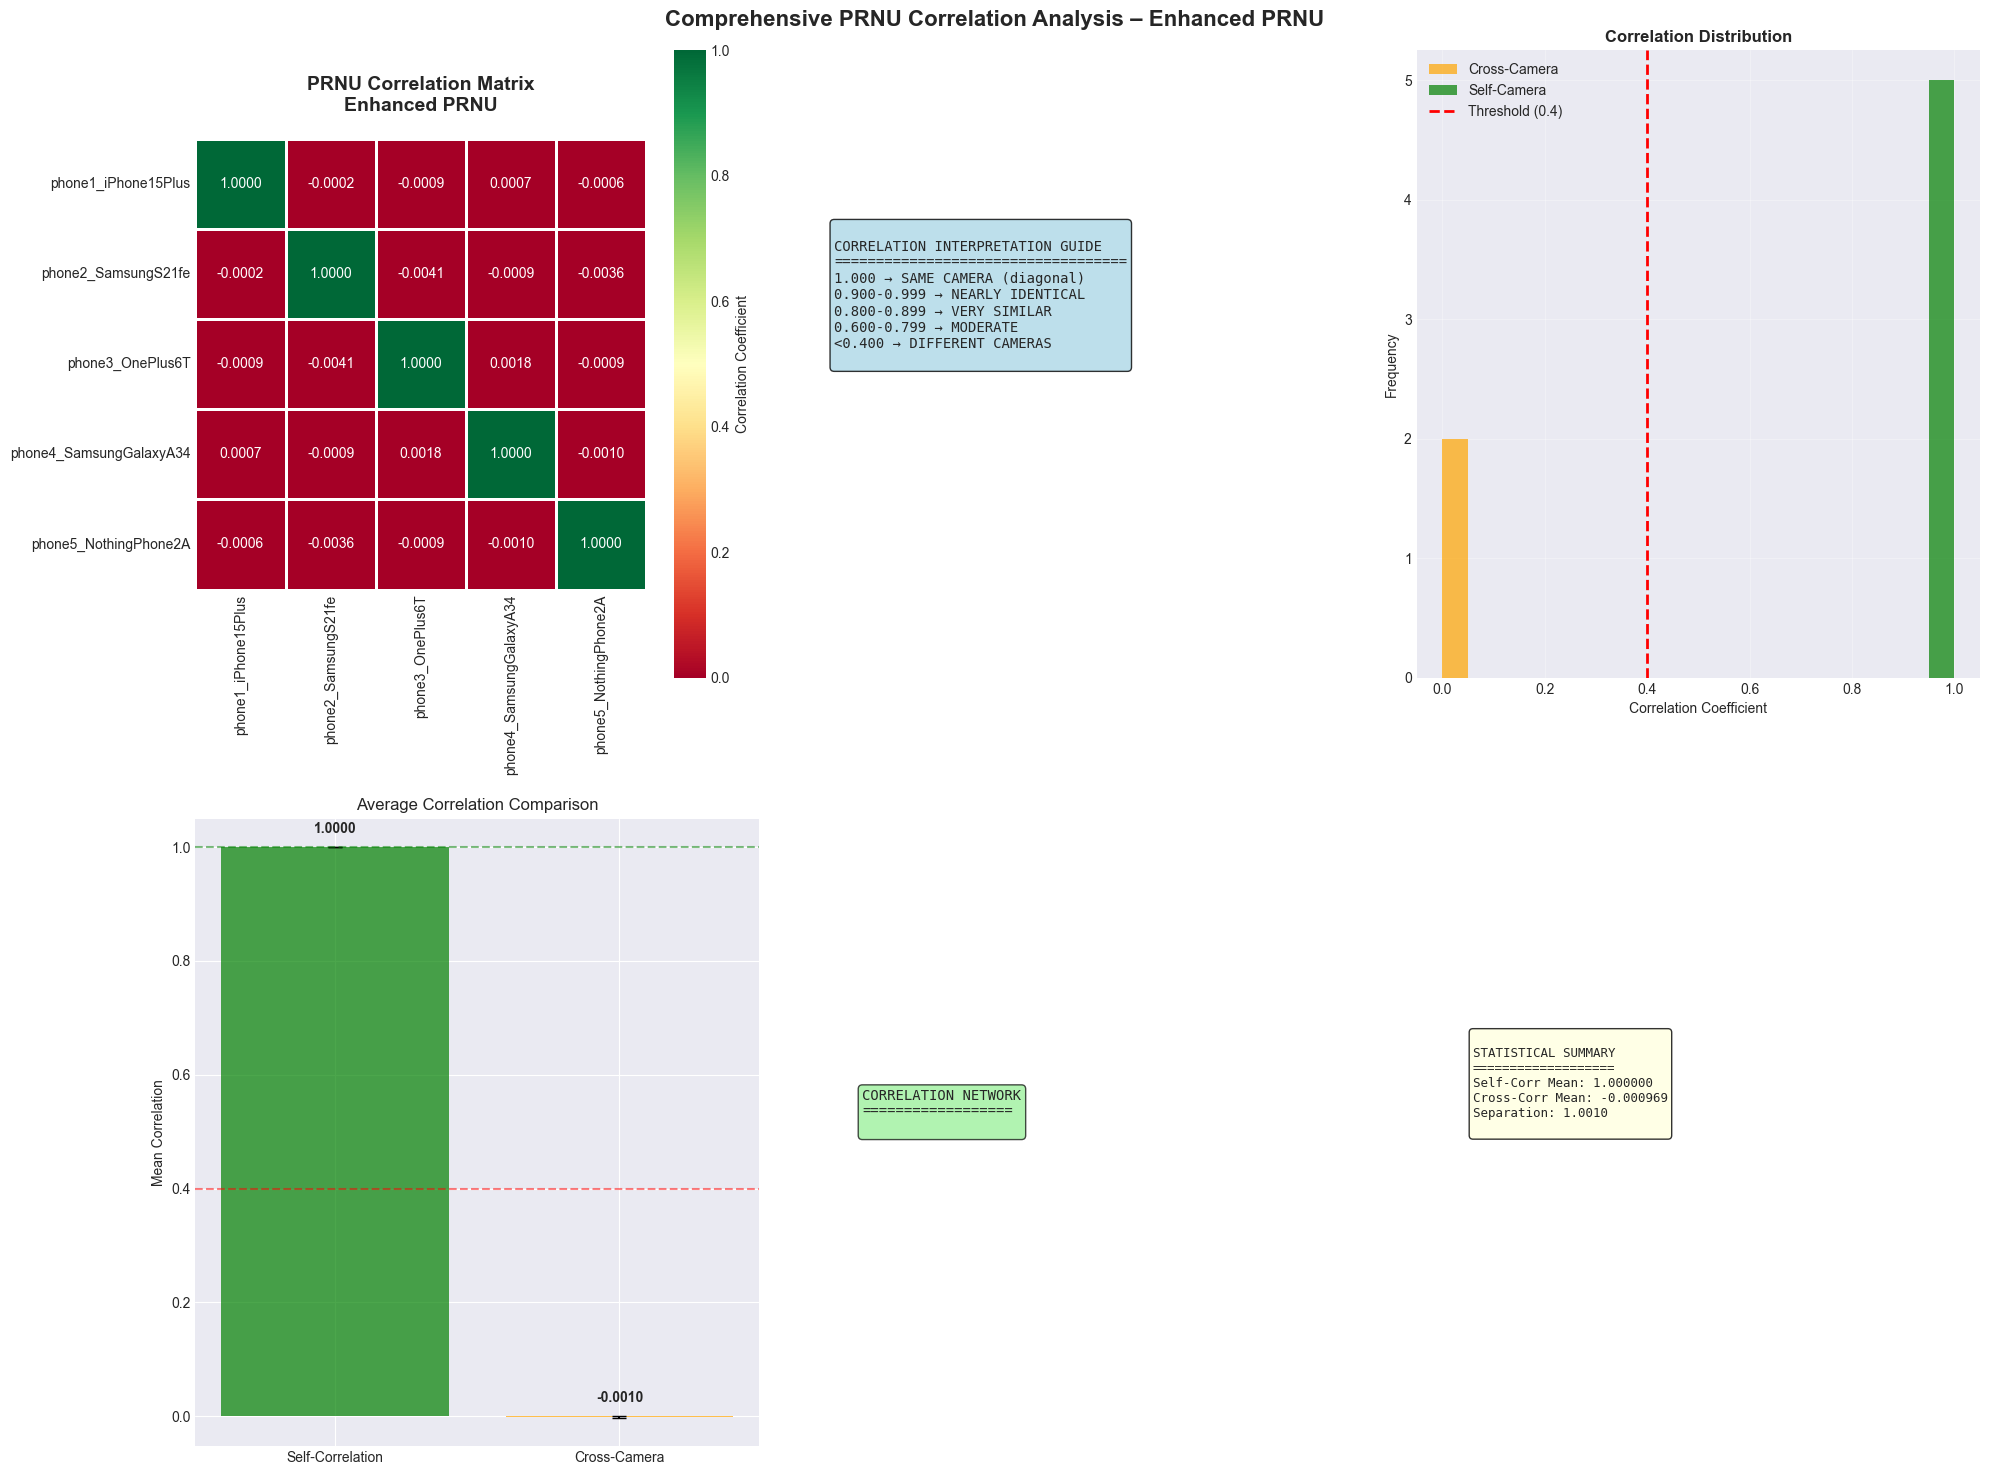


ADVANCED CORRELATION ANALYSIS
Self-Correlation Mean: 1.0000
Cross-Correlation Mean: -0.0010
Separation: 1.0010
Enhanced vs POLIMI heatmaps saved: 02_prnu_analysis/comparison_heatmaps_enhanced_vs_polimi.png


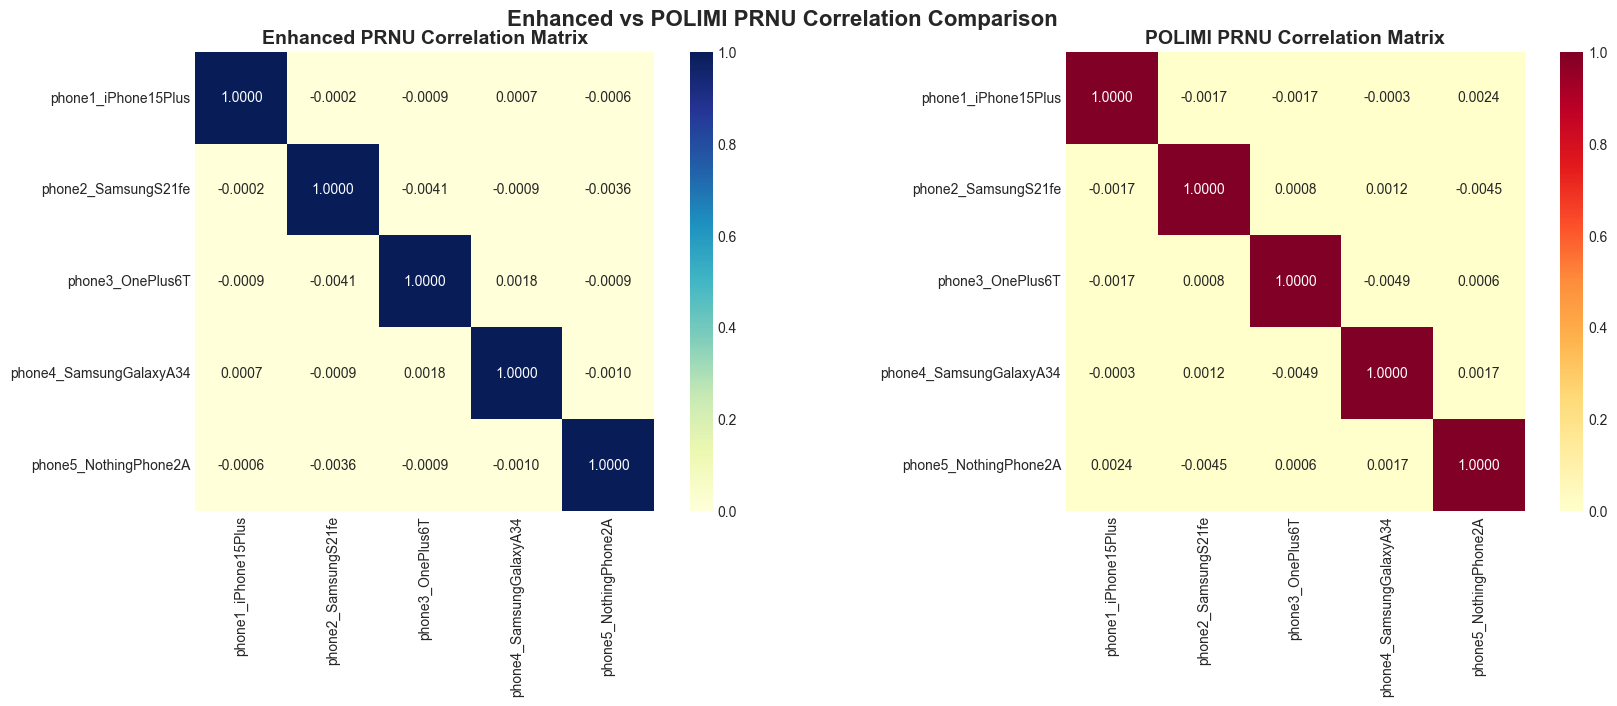


CORRELATION ANALYSIS COMPLETE!
Results saved in: 02_prnu_analysis/
Heatmaps generated for Enhanced and POLIMI methods.


In [61]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

print("\n" + "="*80)
print("COMPREHENSIVE PRNU CORRELATION ANALYSIS")
print("="*80)

# ============================================================================
# CORE FUNCTIONS
# ============================================================================

def calculate_correlation(prnu1, prnu2):
    """Calculate Pearson correlation between two PRNU patterns."""
    p1_flat = prnu1.flatten()
    p2_flat = prnu2.flatten()
    min_len = min(len(p1_flat), len(p2_flat))
    corr, _ = pearsonr(p1_flat[:min_len], p2_flat[:min_len])
    return corr

def comprehensive_correlation_analysis(analyzer, analyzer_type="individual"):
    """
    Perform comprehensive correlation analysis with multiple visualizations.
    """
    if analyzer_type == "individual":
        prnu_dict = analyzer.prnu_fingerprints
        method_name = "PRNU"
    elif analyzer_type == "comparative":
        prnu_dict = analyzer.prnu_fingerprints_enhanced
        method_name = "Enhanced PRNU"
    else:
        print("Invalid analyzer type")
        return
    
    if len(prnu_dict) < 2:
        print("Need at least 2 phones for correlation analysis")
        return
    
    print(f"Calculating correlations for {len(prnu_dict)} phones...")
    print(f"Method: {method_name}")
    
    phone_names = list(prnu_dict.keys())
    n_phones = len(phone_names)
    correlation_matrix = np.zeros((n_phones, n_phones))
    
    print("\nPairwise Correlations:")
    for i in range(n_phones):
        for j in range(n_phones):
            phone1 = phone_names[i]
            phone2 = phone_names[j]
            corr = calculate_correlation(prnu_dict[phone1], prnu_dict[phone2])
            correlation_matrix[i, j] = corr
            if i != j:
                print(f"  {phone1} ↔ {phone2}: {corr:.4f}")
            else:
                print(f"  {phone1} (self): {corr:.4f}")
    
    create_comprehensive_correlation_visualization(correlation_matrix, phone_names, method_name)
    perform_advanced_correlation_analysis(correlation_matrix, phone_names)
    return correlation_matrix

# ============================================================================
# VISUALIZATION
# ============================================================================

def create_comprehensive_correlation_visualization(correlation_matrix, phone_names, method_name):
    """Create comprehensive correlation visualization with multiple plots"""
    n_phones = len(phone_names)
    fig = plt.figure(figsize=(20, 15))

    # Correlation Heatmap
    ax1 = plt.subplot(2, 3, 1)
    sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='RdYlGn',
                xticklabels=phone_names, yticklabels=phone_names,
                center=0.5, square=True, ax=ax1, vmin=0, vmax=1,
                cbar_kws={'label': 'Correlation Coefficient'},
                linewidths=1, linecolor='white')
    ax1.set_title(f'PRNU Correlation Matrix\n{method_name}', fontsize=14, fontweight='bold', pad=20)

    # Correlation Interpretation Guide
    ax2 = plt.subplot(2, 3, 2)
    ax2.axis('off')
    ax2.text(0.05, 0.5, """
CORRELATION INTERPRETATION GUIDE
===================================
1.000 → SAME CAMERA (diagonal)
0.900-0.999 → NEARLY IDENTICAL
0.800-0.899 → VERY SIMILAR
0.600-0.799 → MODERATE
<0.400 → DIFFERENT CAMERAS
""", fontsize=10, family='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    # Distribution Histogram
    ax3 = plt.subplot(2, 3, 3)
    diagonal_values = [correlation_matrix[i, i] for i in range(n_phones)]
    off_diagonal_values = correlation_matrix[np.triu_indices(n_phones, k=1)]
    bins = np.linspace(0, 1, 21)
    ax3.hist(off_diagonal_values, bins=bins, color='orange', alpha=0.7, label='Cross-Camera')
    ax3.hist(diagonal_values, bins=bins, color='green', alpha=0.7, label='Self-Camera')
    ax3.axvline(x=0.4, color='red', linestyle='--', linewidth=2, label='Threshold (0.4)')
    ax3.set_xlabel('Correlation Coefficient'); ax3.set_ylabel('Frequency')
    ax3.set_title('Correlation Distribution', fontsize=12, fontweight='bold')
    ax3.legend(); ax3.grid(True, alpha=0.3)

    # Bar Chart Comparison
    ax4 = plt.subplot(2, 3, 4)
    categories = ['Self-Correlation', 'Cross-Camera']
    means = [np.mean(diagonal_values), np.mean(off_diagonal_values)]
    stds = [np.std(diagonal_values), np.std(off_diagonal_values)]
    bars = ax4.bar(categories, means, yerr=stds, capsize=5, color=['green', 'orange'], alpha=0.7)
    ax4.axhline(y=1.0, color='green', linestyle='--', alpha=0.5)
    ax4.axhline(y=0.4, color='red', linestyle='--', alpha=0.5)
    ax4.set_ylabel('Mean Correlation'); ax4.set_title('Average Correlation Comparison')
    for bar, value in zip(bars, means):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{value:.4f}',
                 ha='center', va='bottom', fontweight='bold')

    # Network Analysis
    ax5 = plt.subplot(2, 3, 5); ax5.axis('off')
    strong_connections = []
    for i in range(n_phones):
        for j in range(i+1, n_phones):
            if correlation_matrix[i, j] > 0.3:
                strong_connections.append((phone_names[i], phone_names[j], correlation_matrix[i, j]))
    strong_connections.sort(key=lambda x: x[2], reverse=True)
    text = "CORRELATION NETWORK\n==================\n"
    for phone1, phone2, corr in strong_connections[:5]:
        text += f"{phone1[:12]} ↔ {phone2[:12]}: {corr:.4f}\n"
    ax5.text(0.1, 0.5, text, fontsize=10, family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

    # Statistical Summary
    ax6 = plt.subplot(2, 3, 6); ax6.axis('off')
    stats_text = f"""
STATISTICAL SUMMARY
===================
Self-Corr Mean: {np.mean(diagonal_values):.6f}
Cross-Corr Mean: {np.mean(off_diagonal_values):.6f}
Separation: {np.mean(diagonal_values) - np.mean(off_diagonal_values):.4f}
"""
    ax6.text(0.1, 0.5, stats_text, fontsize=9, family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    plt.suptitle(f'Comprehensive PRNU Correlation Analysis – {method_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    save_path = f'02_prnu_analysis/prnu_correlation_comprehensive_{method_name.replace(" ", "_").lower()}.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Comprehensive correlation visualization saved: {save_path}")
    plt.show()

# ============================================================================
# ADVANCED ANALYSIS
# ============================================================================

def perform_advanced_correlation_analysis(correlation_matrix, phone_names):
    n_phones = len(phone_names)
    diagonal_values = [correlation_matrix[i, i] for i in range(n_phones)]
    off_diagonal = correlation_matrix[np.triu_indices(n_phones, k=1)]
    print("\nADVANCED CORRELATION ANALYSIS")
    print("="*60)
    print(f"Self-Correlation Mean: {np.mean(diagonal_values):.4f}")
    print(f"Cross-Correlation Mean: {np.mean(off_diagonal):.4f}")
    print(f"Separation: {np.mean(diagonal_values) - np.mean(off_diagonal):.4f}")

# ============================================================================
# COMPARISON: ENHANCED vs POLIMI
# ============================================================================

def plot_enhanced_vs_polimi_heatmaps(comparative_analyzer):
    """Plot and compare correlation heatmaps of Enhanced vs POLIMI PRNU methods."""
    if not hasattr(comparative_analyzer, 'prnu_fingerprints_enhanced') or not hasattr(comparative_analyzer, 'prnu_fingerprints_polimi'):
        print("Required PRNU data not available.")
        return

    phone_names = list(comparative_analyzer.prnu_fingerprints_enhanced.keys())
    n_phones = len(phone_names)

    enhanced_corr = np.zeros((n_phones, n_phones))
    polimi_corr = np.zeros((n_phones, n_phones))
    for i in range(n_phones):
        for j in range(n_phones):
            enhanced_corr[i, j] = calculate_correlation(
                comparative_analyzer.prnu_fingerprints_enhanced[phone_names[i]],
                comparative_analyzer.prnu_fingerprints_enhanced[phone_names[j]]
            )
            polimi_corr[i, j] = calculate_correlation(
                comparative_analyzer.prnu_fingerprints_polimi[phone_names[i]],
                comparative_analyzer.prnu_fingerprints_polimi[phone_names[j]]
            )

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(enhanced_corr, annot=True, fmt=".4f", cmap="YlGnBu",
                xticklabels=phone_names, yticklabels=phone_names, vmin=0, vmax=1, square=True, ax=axes[0])
    axes[0].set_title("Enhanced PRNU Correlation Matrix", fontsize=14, fontweight='bold')

    sns.heatmap(polimi_corr, annot=True, fmt=".4f", cmap="YlOrRd",
                xticklabels=phone_names, yticklabels=phone_names, vmin=0, vmax=1, square=True, ax=axes[1])
    axes[1].set_title("POLIMI PRNU Correlation Matrix", fontsize=14, fontweight='bold')

    plt.suptitle("Enhanced vs POLIMI PRNU Correlation Comparison", fontsize=16, fontweight='bold')
    plt.tight_layout()
    save_path = "02_prnu_analysis/comparison_heatmaps_enhanced_vs_polimi.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Enhanced vs POLIMI heatmaps saved: {save_path}")
    plt.show()

# ============================================================================
# RUN CORRELATION ANALYSIS
# ============================================================================

print("Starting Comprehensive Correlation Analysis...")

if 'comparative_analyzer' in globals() and len(comparative_analyzer.phone_names) >= 2:
    print("Using Comparative Analyzer (Enhanced Method)...")
    correlation_matrix = comprehensive_correlation_analysis(comparative_analyzer, "comparative")
elif 'individual_analyzer' in globals() and len(individual_analyzer.phone_names) >= 2:
    print("Using Individual Analyzer...")
    correlation_matrix = comprehensive_correlation_analysis(individual_analyzer, "individual")
else:
    print("No analyzer with sufficient data found")
    print("Please run phone analysis cells first")

# ============================================================================
# IF BOTH METHODS AVAILABLE – PLOT COMPARISON HEATMAPS
# ============================================================================

if 'comparative_analyzer' in globals() and hasattr(comparative_analyzer, 'prnu_fingerprints_polimi'):
    plot_enhanced_vs_polimi_heatmaps(comparative_analyzer)

print("\nCORRELATION ANALYSIS COMPLETE!")
print("Results saved in: 02_prnu_analysis/")
print("Heatmaps generated for Enhanced and POLIMI methods.")


In [63]:
print("\n" + "="*80)
print("SECTION III:HOG ANALYSIS")
print("="*80)


SECTION III:HOG ANALYSIS


In [65]:
INPUT_DIR = "01_images"  # Root folder containing phone subfolders
OUT_DIR = "03_hog_analysis"
RESIZE_TO = (512, 512)  # (height, width) or (None, None) to keep original
ALPHA_OVERLAY = 0.55    # Transparency for HOG overlay

# HOG parameters (similar to lecture examples)
HOG_PARAMS = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'visualize': True,
    'channel_axis': None  # for grayscale
}

VALID_EXTS = ('.jpg', '.jpeg', '.png', '.bmp')

In [66]:
# ============================================================================
# HELPER FUNCTIONS
# ============================================================================


def ensure_dir(p: Path):
    p.parent.mkdir(parents=True, exist_ok=True)

def list_images(root: Path):
    """Find all images in the directory tree"""
    if root.is_file() and root.suffix.lower() in VALID_EXTS:
        return [root]
    imgs = []
    for ext in VALID_EXTS:
        imgs.extend(root.rglob(f"*{ext}"))
    return imgs

def read_image_gray(path: Path):
    """Read image using OpenCV (more reliable than skimage.io)"""
    # Read with OpenCV
    img_bgr = cv2.imread(str(path))
    if img_bgr is None:
        raise ValueError(f"Could not read image: {path}")
    
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale and normalize to [0,1]
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.astype(np.float32) / 255.0
    
    return img_rgb, img_gray

def maybe_resize(img_rgb, img_gray, target_hw):
    """Resize images to target dimensions"""
    if target_hw is None or target_hw[0] is None or target_hw[1] is None:
        return img_rgb, img_gray
    th, tw = target_hw
    rgb_resized = cv2.resize(img_rgb, (tw, th), interpolation=cv2.INTER_AREA)
    gray_resized = cv2.resize(img_gray, (tw, th), interpolation=cv2.INTER_AREA)
    return rgb_resized, gray_resized

def save_hog_heatmap(hog_image, out_path_png):
    """Save HOG heatmap visualization"""
    hog_vis = exposure.rescale_intensity(hog_image, in_range=(0, hog_image.max()))
    plt.figure(figsize=(6,6))
    plt.imshow(hog_vis, cmap='gray')
    plt.axis('off')
    plt.title('HOG Heatmap')
    ensure_dir(Path(out_path_png))
    plt.savefig(out_path_png, bbox_inches='tight', pad_inches=0, dpi=150)
    plt.close()

def save_hog_overlay(original_rgb, hog_image, out_path_png, alpha=0.55):
    """Save HOG overlay on original image"""
    hog_vis = exposure.rescale_intensity(hog_image, in_range=(0, hog_image.max()))
    hog_vis = (hog_vis / (hog_vis.max() + 1e-8))
    hog_color = plt.cm.inferno(hog_vis)[..., :3]  # RGB from colormap

    # Ensure original is 0..1 floats
    if original_rgb.dtype != np.float32 and original_rgb.dtype != np.float64:
        base = original_rgb.astype(np.float32) / 255.0
    else:
        base = original_rgb.copy()
        if base.max() > 1.5:
            base = base / 255.0

    overlay = (1 - alpha) * base + alpha * hog_color
    overlay = np.clip(overlay, 0, 1)

    plt.figure(figsize=(6,6))
    plt.imshow(overlay)
    plt.axis('off')
    plt.title('HOG Overlay on Original')
    ensure_dir(Path(out_path_png))
    plt.savefig(out_path_png, bbox_inches='tight', pad_inches=0, dpi=150)
    plt.close()

def save_gradient_quiver(gray01, out_path_png, step=16, scale=25.0):
    """Save gradient orientation quiver plot"""
    # Compute gradients using Sobel
    gX = cv2.Sobel(gray01, cv2.CV_32F, 1, 0, ksize=3)
    gY = cv2.Sobel(gray01, cv2.CV_32F, 0, 1, ksize=3)
    mag = np.sqrt(gX**2 + gY**2) + 1e-8

    # Downsample grid for cleaner visualization
    H, W = gray01.shape
    ys = np.arange(step//2, H, step)
    xs = np.arange(step//2, W, step)
    Y, X = np.meshgrid(ys, xs, indexing='ij')

    U = gX[Y, X]
    V = -gY[Y, X]  # negative for image coordinates
    M = mag[Y, X]
    
    # Normalize vectors for cleaner arrows
    U_norm = U / (M + 1e-8)
    V_norm = V / (M + 1e-8)

    plt.figure(figsize=(6,6))
    plt.imshow(gray01, cmap='gray')
    plt.quiver(X, Y, U_norm, V_norm, M, 
               angles='xy', scale_units='xy', scale=scale, 
               width=0.002, cmap='viridis')
    plt.axis('off')
    plt.title('Gradient Orientation (Quiver Plot)')
    ensure_dir(Path(out_path_png))
    plt.savefig(out_path_png, bbox_inches='tight', pad_inches=0, dpi=150)
    plt.close()

def write_csv_header(csv_path, header):
    """Write CSV header"""
    ensure_dir(Path(csv_path))
    if not os.path.exists(csv_path):
        with open(csv_path, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(header)

def append_row(csv_path, row):
    """Append row to CSV"""
    with open(csv_path, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(row)


In [67]:
print("STARTING HOG ANALYSIS")
print("="*80)

root = Path(INPUT_DIR)
if not root.exists():
    print(f"INPUT_DIR not found: {root.resolve()}")
else:
    out_root = Path(OUT_DIR)
    out_root.mkdir(parents=True, exist_ok=True)
    features_csv = out_root / "hog_features.csv"
    
    # Create comprehensive header
    header = ["image_path", "phone", "image_type", "hog_vector_length"] + [f"hog_feature_{i}" for i in range(1, 6)] + ["features_truncated"]
    write_csv_header(features_csv, header)

    all_images = list_images(root)
    if not all_images:
        print(f"No images found under: {root.resolve()}")
    else:
        print(f"Found {len(all_images)} images under {root.resolve()}")
        
        processed_count = 0
        for img_path in tqdm(all_images, desc="Processing HOG"):
            # Extract phone name and image type from path
            rel_path = img_path.relative_to(root)
            phone_name = rel_path.parts[0] if len(rel_path.parts) > 1 else "unknown"
            image_name = rel_path.stem
            
            # Determine image type from filename
            image_type = "unknown"
            if "high_resolution" in image_name.lower():
                image_type = "high_res"
            elif "low_resolution" in image_name.lower():
                image_type = "low_res" 
            elif "high_light" in image_name.lower():
                image_type = "high_light"
            elif "low_light" in image_name.lower():
                image_type = "low_light"
            elif "weather" in image_name.lower() or "occlusion" in image_name.lower():
                image_type = "weather_occlusion"
            
            try:
                rgb, gray01 = read_image_gray(img_path)
                rgb_resized, gray_resized = maybe_resize(rgb, gray01, RESIZE_TO)

                # HOG features + visualization
                fd, hog_image = hog(gray_resized, **HOG_PARAMS)

                # Create output filename with phone and image type
                output_stem = f"{phone_name}_{image_type}_{image_name}"
                
                # Save visuals
                heatmap_path = out_root / f"{output_stem}_hog_heatmap.png"
                overlay_path = out_root / f"{output_stem}_hog_overlay.png"
                quiver_path  = out_root / f"{output_stem}_grad_quiver.png"

                save_hog_heatmap(hog_image, str(heatmap_path))
                save_hog_overlay(rgb_resized, hog_image, str(overlay_path), alpha=ALPHA_OVERLAY)
                save_gradient_quiver(gray_resized, str(quiver_path))

                # Save features with comprehensive information
                preview_features = list(fd[:5])  # first 5 for preview
                row_data = [
                    str(rel_path),
                    phone_name,
                    image_type,
                    len(fd)
                ] + preview_features + ["...full_vector_available"]
                
                append_row(features_csv, row_data)
                processed_count += 1

            except Exception as e:
                print(f"Failed on {img_path}: {e}")

    print(f"\nHOG ANALYSIS COMPLETE!")
    print(f"Processed {processed_count}/{len(all_images)} images successfully")
    print(f"Visualizations saved in: {out_root.resolve()}")
    print(f"Feature CSV: {features_csv.resolve()}")
    
    # Display sample results
    if processed_count > 0:
        print(f"\nGenerated for each image:")
        print(f" HOG Heatmap (grayscale HOG patterns)")
        print(f" HOG Overlay (HOG on original image)") 
        print(f" Gradient Quiver (orientation arrows)")
        print(f" Feature vectors (CSV with statistics)")

STARTING HOG ANALYSIS
Found 25 images under D:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\01_images


Processing HOG: 100%|██████████| 25/25 [00:48<00:00,  1.92s/it]


HOG ANALYSIS COMPLETE!
Processed 25/25 images successfully
Visualizations saved in: D:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\03_hog_analysis
Feature CSV: D:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\03_hog_analysis\hog_features.csv

Generated for each image:
 HOG Heatmap (grayscale HOG patterns)
 HOG Overlay (HOG on original image)
 Gradient Quiver (orientation arrows)
 Feature vectors (CSV with statistics)


In [68]:
#============================================================================
# HOG STATISTICS AND SUMMARY
# ============================================================================

def analyze_hog_statistics():
    """Analyze and display HOG feature statistics"""
    csv_path = Path(OUT_DIR) / "hog_features.csv"
    
    if not csv_path.exists():
        print("HOG features CSV not found")
        return None
    
    try:
        import pandas as pd
        
        # Read the CSV
        df = pd.read_csv(csv_path)
        
        print(f"\nHOG FEATURE STATISTICS")
        print("="*50)
        print(f"Total images analyzed: {len(df)}")
        print(f"Unique phones: {df['phone'].nunique()}")
        print(f"Image types: {', '.join(df['image_type'].unique())}")
        
        # Basic statistics
        print(f"\nHOG Vector Statistics:")
        print(f"  Average length: {df['hog_vector_length'].mean():.0f} features")
        print(f"  Range: {df['hog_vector_length'].min():.0f} - {df['hog_vector_length'].max():.0f} features")
        
        # Statistics by phone
        print(f"\nImages per Phone:")
        phone_counts = df['phone'].value_counts()
        for phone, count in phone_counts.items():
            print(f"  {phone}: {count} images")
        
        # Statistics by image type
        print(f"\nImages per Type:")
        type_counts = df['image_type'].value_counts()
        for img_type, count in type_counts.items():
            print(f"  {img_type}: {count} images")
        
        return df
        
    except Exception as e:
        print(f"Error analyzing statistics: {e}")
        return None

# Run statistics analysis
print("\n" + "="*80)
print("ANALYZING HOG RESULTS...")
print("="*80)

hog_df = analyze_hog_statistics()

print("\n" + "="*80)
print("HOG ANALYSIS SECTION COMPLETE!")
print("="*80)
print("Next: Proceed to Noise Removal Analysis")


ANALYZING HOG RESULTS...

HOG FEATURE STATISTICS
Total images analyzed: 100
Unique phones: 5
Image types: high_res, high_light, low_light, weather_occlusion, low_res

HOG Vector Statistics:
  Average length: 142884 features
  Range: 142884 - 142884 features

Images per Phone:
  phone2_SamsungS21fe: 20 images
  phone3_OnePlus6T: 20 images
  phone4_SamsungGalaxyA34: 20 images
  phone5_NothingPhone2A: 20 images
  phone1_iPhone15Plus: 20 images

Images per Type:
  high_res: 20 images
  high_light: 20 images
  low_light: 20 images
  weather_occlusion: 20 images
  low_res: 20 images

HOG ANALYSIS SECTION COMPLETE!
Next: Proceed to Noise Removal Analysis


In [34]:
# ================================
# SECTION IV: NOISE REMOVAL
# Median Filter & Gaussian Smoothing 
# Project root assumed: current notebook folder
# Images under: 01_images/<phone_name>/*.jpg|*.png|...
# Outputs into: 04_noise_removal/{median_filter, gaussian_smoothing, comparisons}
# Metrics CSV  : 04_noise_removal/noise_metrics.csv
# ================================

In [35]:
BASE_DIR = Path.cwd()
IMG_ROOT = BASE_DIR / "01_images"
OUT_ROOT = BASE_DIR / "04_noise_removal"
DIR_MEDIAN = OUT_ROOT / "median_filter"
DIR_GAUSS  = OUT_ROOT / "gaussian_smoothing"
DIR_COMP   = OUT_ROOT / "comparisons"

In [36]:
for d in [DIR_MEDIAN, DIR_GAUSS, DIR_COMP]:
    d.mkdir(parents=True, exist_ok=True)

VALID_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")


In [37]:
MEDIAN_KSIZE = 5              # kernel size must be odd (3,5,7,...)
GAUSS_KSIZE  = (5, 5)         # kernel size must be odd in both dims
GAUSS_SIGMA  = 1.5            # sigmaX; sigmaY=0 -> computed from sigmaX

In [69]:
# --------------------
# Helpers
# --------------------
def list_phone_folders(img_root: Path):
    """Return subfolders under 01_images (phones). If images are directly inside, return [img_root]."""
    subs = [p for p in img_root.iterdir() if p.is_dir()]
    return subs if subs else [img_root]

def list_images(folder: Path):
    files = []
    for ext in VALID_EXTS:
        files.extend(folder.rglob(f"*{ext}"))
    return sorted(files)

def imread_color(path: Path):
    """Read image in BGR; if gray, convert to 3-channel for consistent visualization."""
    img = cv2.imread(str(path), cv2.IMREAD_COLOR)
    return img  # BGR uint8

def to_float01(img_bgr_uint8):
    return img_bgr_uint8.astype(np.float32) / 255.0

def save_comparison(original_bgr, median_bgr, gauss_bgr, title, out_path_png):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original', fontsize=12, fontweight='bold'); axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(median_bgr, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Median Filter', fontsize=12, fontweight='bold'); axes[1].axis('off')
    axes[2].imshow(cv2.cvtColor(gauss_bgr, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Gaussian Smoothing', fontsize=12, fontweight='bold'); axes[2].axis('off')
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    fig.savefig(str(out_path_png), dpi=300, bbox_inches='tight')
    plt.close(fig)


In [70]:
print("\n" + "="*80)
print("SECTION IV: NOISE REMOVAL - MEDIAN FILTER & GAUSSIAN SMOOTHING")
print("="*80)


SECTION IV: NOISE REMOVAL - MEDIAN FILTER & GAUSSIAN SMOOTHING


In [71]:

if not IMG_ROOT.exists():
    raise FileNotFoundError(f"Images root not found: {IMG_ROOT}")

phone_folders = list_phone_folders(IMG_ROOT)

noise_metrics = []
print("\nApplying noise removal to all images...")
for phone_folder in tqdm(phone_folders):
    phone_name = phone_folder.name
    imgs = list_images(phone_folder)
    if not imgs:
        continue

    for img_path in imgs:
        image_name = img_path.stem  # filename without extension
        # ---- read
        img_bgr = imread_color(img_path)
        if img_bgr is None:
            print(f"Could not read: {img_path}")
            continue

        # ---- filters (Lecture IIc)
        median_bgr = cv2.medianBlur(img_bgr, MEDIAN_KSIZE)
        gauss_bgr  = cv2.GaussianBlur(img_bgr, GAUSS_KSIZE, GAUSS_SIGMA)

        # ---- save filtered images
        median_path   = DIR_MEDIAN / f"{phone_name}_{image_name}_median.jpg"
        gaussian_path = DIR_GAUSS  / f"{phone_name}_{image_name}_gaussian.jpg"
        cv2.imwrite(str(median_path), median_bgr)
        cv2.imwrite(str(gaussian_path), gauss_bgr)

        # ---- comparison panel
        comp_path = DIR_COMP / f"{phone_name}_{image_name}_comparison.png"
        save_comparison(img_bgr, median_bgr, gauss_bgr,
                        f"{phone_name} - {image_name}", comp_path)

        # ---- metrics (PSNR/MSE) on float [0,1]
        ref = to_float01(img_bgr)
        med = to_float01(median_bgr)
        gau = to_float01(gauss_bgr)

        psnr_median = peak_signal_noise_ratio(ref, med, data_range=1.0)
        psnr_gauss  = peak_signal_noise_ratio(ref, gau, data_range=1.0)
        mse_median  = mean_squared_error(ref, med)
        mse_gauss   = mean_squared_error(ref, gau)

        noise_metrics.append({
            "phone": phone_name,
            "image": image_name,
            "psnr_median": psnr_median,
            "psnr_gaussian": psnr_gauss,
            "mse_median": mse_median,
            "mse_gaussian": mse_gauss,
            "ssim_median": ssim(ref, med, channel_axis=2, data_range=1.0),
            "ssim_gauss": ssim(ref, gau, channel_axis=2, data_range=1.0)

        })


Applying noise removal to all images...


100%|██████████| 5/5 [02:25<00:00, 29.15s/it]


In [74]:
if noise_metrics:
    df_noise = pd.DataFrame(noise_metrics)
    OUT_ROOT.mkdir(parents=True, exist_ok=True)
    csv_path = OUT_ROOT / "noise_metrics.csv"
    df_noise.to_csv(csv_path, index=False)

    print("\nNoise Removal Complete!")
    print(f"Filtered images saved in: {OUT_ROOT}")
    print(f"Metrics CSV             : {csv_path}")

    # Per-phone PSNR means (quick view)
    try:
        print("\nNoise Removal Quality Metrics (mean PSNR by phone):")
        print(df_noise.groupby('phone')[['psnr_median', 'psnr_gaussian','ssim_median','ssim_gauss']].mean().round(3))
    except Exception:
        pass
else:
    print("No images were processed. Check your 01_images folder and file extensions.")


Noise Removal Complete!
Filtered images saved in: d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\04_noise_removal
Metrics CSV             : d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\04_noise_removal\noise_metrics.csv

Noise Removal Quality Metrics (mean PSNR by phone):
                         psnr_median  psnr_gaussian  ssim_median  ssim_gauss
phone                                                                       
phone1_iPhone15Plus           34.879         35.284        0.902       0.923
phone2_SamsungS21fe           36.392         36.682        0.924       0.936
phone3_OnePlus6T              37.581         37.618        0.951       0.957
phone4_SamsungGalaxyA34       25.716         26.637        0.666       0.734
phone5_NothingPhone2A         40.619         40.895        0.903       0.920


In [75]:
print("\n" + "="*80)
print("SECTION V: YOLO11 – Explore 5 features on originals vs denoised images")
print(" Features covered: \n 1) Detection (yolo11n.pt, yolo11s.pt) \n 2) Segmentation (yolo11n-seg.pt) \n 3) Pose estimation (yolo11n-pose.pt) \n 4) Model size trade-offs (n vs s): latency & counts \n 5) NMS/threshold tuning: (conf, iou) pair \n Docs: https://docs.ultralytics.com/models/yolo11/")
print("="*80)


SECTION V: YOLO11 – Explore 5 features on originals vs denoised images
 Features covered: 
 1) Detection (yolo11n.pt, yolo11s.pt) 
 2) Segmentation (yolo11n-seg.pt) 
 3) Pose estimation (yolo11n-pose.pt) 
 4) Model size trade-offs (n vs s): latency & counts 
 5) NMS/threshold tuning: (conf, iou) pair 
 Docs: https://docs.ultralytics.com/models/yolo11/


In [87]:
BASE_DIR = Path.cwd()
IMG_ORIG = BASE_DIR / "01_images"
IMG_MED  = BASE_DIR / "04_noise_removal" / "median_filter"
IMG_GAU  = BASE_DIR / "04_noise_removal" / "gaussian_smoothing"
OUT_DIR  = BASE_DIR / "05_yolo11_analysis"

OUT_DIR.mkdir(exist_ok=True, parents=True)

VALID_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

In [77]:
weights = {
    "yolo11n.pt": "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt",
    "yolo11s.pt": "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt",
    "yolo11n-seg.pt": "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-seg.pt",
    "yolo11n-pose.pt": "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-pose.pt",
}

In [88]:
import urllib.request
for fname, url in weights.items():
    dest = BASE_DIR / fname
    if not dest.exists():
        print(f"Downloading {fname} ...")
        urllib.request.urlretrieve(url, dest)
        print(f"Saved: {dest}")

In [89]:
def list_images(root: Path):
    imgs = []
    if root.exists():
        for ext in VALID_EXTS:
            imgs.extend(root.rglob(f"*{ext}"))
    return sorted(imgs)

def run_yolo(model_path, imgs, task_name, conf=0.25, iou=0.7, out_subdir="detect"):
    model = YOLO(str(model_path))
    records = []

    out_task_dir = OUT_DIR / out_subdir / Path(model_path).stem
    out_task_dir.mkdir(parents=True, exist_ok=True)

    for img_path in tqdm(imgs, desc=f"{task_name} - {model_path}"):
        start = time.time()
        results = model.predict(source=str(img_path), conf=conf, iou=iou, verbose=False)
        elapsed = time.time() - start

        res = results[0]
        save_path = out_task_dir / f"{img_path.stem}__{Path(model_path).stem}.jpg"
        cv2.imwrite(str(save_path), res.plot())

        records.append({
            "image": img_path.name,
            "task": task_name,
            "model": Path(model_path).stem,
            "num_instances": len(res.boxes),
            "mean_conf": float(res.boxes.conf.mean()) if len(res.boxes) else 0,
            "latency_s": round(elapsed, 3)
        })
    return pd.DataFrame(records)

In [90]:
orig_imgs = list_images(IMG_ORIG)
med_imgs  = list_images(IMG_MED)
gau_imgs  = list_images(IMG_GAU)

print(f"Found: {len(orig_imgs)} original, {len(med_imgs)} median, {len(gau_imgs)} gaussian images")

all_dfs = []


Found: 25 original, 25 median, 25 gaussian images


In [93]:

# Feature 1: Object Detection (small vs nano model)
for imgs, name in [(orig_imgs, "original"), (med_imgs, "median"), (gau_imgs, "gaussian")]:
    if not imgs: continue
    all_dfs.append(run_yolo("./yolo11n.pt", imgs, f"detect_{name}", out_subdir=f"detect_{name}"))
    all_dfs.append(run_yolo("./yolo11s.pt", imgs, f"detect_{name}", out_subdir=f"detect_{name}"))


detect_gaussian - ./yolo11s.pt: 100%|██████████| 25/25 [00:03<00:00,  6.25it/s]


In [94]:
# Feature 2: Segmentation
for imgs, name in [(orig_imgs, "original"), (med_imgs, "median"), (gau_imgs, "gaussian")]:
    if not imgs: continue
    all_dfs.append(run_yolo("./yolo11n-seg.pt", imgs, f"segment_{name}", out_subdir=f"segment_{name}"))


segment_gaussian - ./yolo11n-seg.pt: 100%|██████████| 25/25 [00:04<00:00,  6.22it/s]


In [95]:
# Feature 3: Pose Estimation
for imgs, name in [(orig_imgs, "original"), (med_imgs, "median"), (gau_imgs, "gaussian")]:
    if not imgs: continue
    all_dfs.append(run_yolo("./yolo11n-pose.pt", imgs, f"pose_{name}", out_subdir=f"pose_{name}"))


pose_gaussian - ./yolo11n-pose.pt: 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]


In [96]:
# ==========================================================
# Image Classification & Oriented Object Detection (OBB)
# ==========================================================

# --- Image Classification ---
def run_classification(model_path, imgs, set_name):
    model = YOLO(str(model_path))
    out_dir = OUT_DIR / "classification" / set_name
    out_dir.mkdir(parents=True, exist_ok=True)
    records = []

    for img_path in tqdm(imgs, desc=f"classification - {set_name}"):
        result = model.predict(source=str(img_path), verbose=False)
        pred_class = result[0].probs.top1
        class_name = result[0].names[pred_class]
        conf = float(result[0].probs.top1conf)
        save_path = out_dir / f"{img_path.stem}_classified.jpg"
        cv2.imwrite(str(save_path), result[0].plot())

        records.append({
            "image": img_path.name,
            "set": set_name,
            "pred_class": class_name,
            "confidence": conf
        })
    return pd.DataFrame(records)

# --- Oriented Bounding Boxes (OBB) ---
def run_obb(model_path, imgs, set_name):
    model = YOLO(str(model_path))
    out_dir = OUT_DIR / "obb" / set_name
    out_dir.mkdir(parents=True, exist_ok=True)
    records = []

    for img_path in tqdm(imgs, desc=f"OBB - {set_name}"):
        result = model.predict(source=str(img_path), verbose=False)
        save_path = out_dir / f"{img_path.stem}_obb.jpg"
        cv2.imwrite(str(save_path), result[0].plot())

        records.append({
            "image": img_path.name,
            "set": set_name,
            "num_obb": len(result[0].obb) if hasattr(result[0], "obb") else 0
        })
    return pd.DataFrame(records)

# ----------------- Run on all 3 sets -----------------
cls_results = []
obb_results = []

for imgs, name in [(orig_imgs, "original"), (med_imgs, "median"), (gau_imgs, "gaussian")]:
    if not imgs: continue
    cls_results.append(run_classification("./yolo11n-cls.pt", imgs, name))
    obb_results.append(run_obb("./yolo11n-obb.pt", imgs, name))

df_cls = pd.concat(cls_results, ignore_index=True)
df_obb = pd.concat(obb_results, ignore_index=True)

df_cls.to_csv(OUT_DIR / "yolo11_classification_metrics.csv", index=False)
df_obb.to_csv(OUT_DIR / "yolo11_obb_metrics.csv", index=False)

print("\n Image Classification & OBB analysis complete!")
print("Classification results:", OUT_DIR / "classification")
print("OBB results:", OUT_DIR / "obb")


OBB - gaussian: 100%|██████████| 25/25 [00:06<00:00,  4.11it/s]


 Image Classification & OBB analysis complete!
Classification results: d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\05_yolo11_analysis\classification
OBB results: d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\05_yolo11_analysis\obb


In [97]:
# --------------------------------------
# Combine metrics & analyze
# --------------------------------------
df_metrics = pd.concat(all_dfs, ignore_index=True)
df_metrics.to_csv(OUT_DIR / "yolo11_metrics.csv", index=False)

print("\nYOLO11 analysis complete!")
print("Results saved in:", OUT_DIR)
print("Metrics CSV:", OUT_DIR / "yolo11_metrics.csv")

# Quick summary
print("\nMean latency by model:")
print(df_metrics.groupby("model")["latency_s"].mean().round(3))

print("\nMean detections by model:")
print(df_metrics.groupby("model")["num_instances"].mean().round(2))

print("\nMean confidence by model:")
print(df_metrics.groupby("model")["mean_conf"].mean().round(3))


YOLO11 analysis complete!
Results saved in: d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\05_yolo11_analysis
Metrics CSV: d:\Desktop\SCIT\Sem 3\Computer Vision\SDG6_Computer_Vision_Project\05_yolo11_analysis\yolo11_metrics.csv

Mean latency by model:
model
yolo11n         0.113
yolo11n-pose    0.116
yolo11n-seg     0.118
yolo11s         0.147
Name: latency_s, dtype: float64

Mean detections by model:
model
yolo11n         1.01
yolo11n-pose    0.48
yolo11n-seg     1.11
yolo11s         1.32
Name: num_instances, dtype: float64

Mean confidence by model:
model
yolo11n         0.342
yolo11n-pose    0.168
yolo11n-seg     0.376
yolo11s         0.379
Name: mean_conf, dtype: float64
